# GLISTER Experiments

Table of Contents:
1. Experiments on `DNA`
    - Data
    - Model: TwoLayerNet()
    - Glister:
        - GlisterNaive
        - GlisterStochasticReg
        - GlisterStochasticNoReg
    - Model trained on Glister subsets:
        - GlisterNaive
        - GlisterStochasticReg
        - GlisterStochasticNoReg
    - Model trained on full train
    - Random predictions
    - Save
    - Plots
    
2. Experiments on `Digits`
    - Data
    - Model: MnistNet()
    - GlisterImage
    - Model trained on Glister subsets
    - Model trained on full train
    - Random predictions
    - Save
    - Plots

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.utils.data as torch_data
from torch.utils.data import DataLoader

from train import train


## Experiments on `DNA`

In [63]:
from GlisterRegular.GlisterNaive import GlisterNaive
from GlisterRegular.GlisterStochastic import GlisterStochasticReg, GlisterStochasticNoReg

In [64]:
torch.manual_seed(42)
np.random.seed(42)

### Data

In [65]:
class DNA_DATA(torch_data.Dataset):
    
    def __init__(self, X, y):
        super(DNA_DATA, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long) 
    
    def __len__(self):
        return list(self.X.size())[0]
    
    def __getitem__(self, idx):
        return (self.X[idx, :], self.y[idx])

In [66]:
data = pd.read_csv('dna.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis = 1), data['class'], test_size = 0.3)
y_train = y_train - 1
y_test = y_test - 1

In [67]:
fullset = DNA_DATA(np.array(X_train), np.array(y_train))
valset = DNA_DATA(np.array(X_train), np.array(y_train))
testset = DNA_DATA(np.array(X_test), np.array(y_test))

### Model

In [68]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(180, 20)
        self.linear2 = torch.nn.Linear(20, 3)
    
    def forward(self, x, last=False):
        l1scores = torch.nn.functional.relu(self.linear1(x))
        scores = self.linear2(l1scores)
        if last:
            return scores, l1scores
        else:
            return scores

### GlisterNaive

In [69]:
glister_naive_acc = []
glister_naive_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister_naive = GlisterNaive(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 3,
    n_channels = 1,
    bud = int(k * len(fullset)),
    lam = 0.1)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister_naive.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_naive_acc.append(tst_acc)
    glister_naive_indexes.append(idxs)

Epoch: 1 SubsetTrn,FullTrn,ValLoss: 1.0828784704208374 110.21994388103485 5.44965386390686
selEpoch: 0, Starting Selection: 2021-03-21 12:22:43.295486
numSelected: 0 Time for 1: 0.003390073776245117
selEpoch: 0, Selection Ended at: 2021-03-21 12:22:43.406310
Epoch: 2 SubsetTrn,FullTrn,ValLoss: 11.89426839351654 106.0469052195549 5.19478714466095
selEpoch: 1, Starting Selection: 2021-03-21 12:22:43.441653
numSelected: 0 Time for 1: 0.0031418800354003906


/Users/vladimiromelyusik/glister_online/final_experiments/GlisterRegular/set_function.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


selEpoch: 1, Selection Ended at: 2021-03-21 12:22:43.553253
Epoch: 3 SubsetTrn,FullTrn,ValLoss: 11.286416172981262 103.22926104068756 5.04783970117569
selEpoch: 2, Starting Selection: 2021-03-21 12:22:43.589700
numSelected: 0 Time for 1: 0.003371000289916992
selEpoch: 2, Selection Ended at: 2021-03-21 12:22:43.697361
Epoch: 4 SubsetTrn,FullTrn,ValLoss: 11.255532085895538 101.5339903831482 4.949522137641907
selEpoch: 3, Starting Selection: 2021-03-21 12:22:43.732602
numSelected: 0 Time for 1: 0.0033931732177734375
selEpoch: 3, Selection Ended at: 2021-03-21 12:22:43.844124
Epoch: 5 SubsetTrn,FullTrn,ValLoss: 10.831228613853455 99.58347249031067 4.800527036190033
selEpoch: 4, Starting Selection: 2021-03-21 12:22:43.879878
numSelected: 0 Time for 1: 0.003156900405883789
selEpoch: 4, Selection Ended at: 2021-03-21 12:22:43.988364
Epoch: 6 SubsetTrn,FullTrn,ValLoss: 10.610350847244263 97.36486274003983 4.723958849906921
selEpoch: 5, Starting Selection: 2021-03-21 12:22:44.025737
numSelected

selEpoch: 33, Selection Ended at: 2021-03-21 12:22:48.564218
Epoch: 35 SubsetTrn,FullTrn,ValLoss: 2.8983498960733414 18.246094308793545 1.0979163497686386
selEpoch: 34, Starting Selection: 2021-03-21 12:22:48.600937
numSelected: 0 Time for 1: 0.0032958984375
selEpoch: 34, Selection Ended at: 2021-03-21 12:22:48.708782
Epoch: 36 SubsetTrn,FullTrn,ValLoss: 2.781295493245125 17.304741360247135 1.1005847305059433
selEpoch: 35, Starting Selection: 2021-03-21 12:22:48.743803
numSelected: 0 Time for 1: 0.0032241344451904297
selEpoch: 35, Selection Ended at: 2021-03-21 12:22:48.852703
Epoch: 37 SubsetTrn,FullTrn,ValLoss: 2.6745086908340454 17.003358706831932 0.9489915147423744
selEpoch: 36, Starting Selection: 2021-03-21 12:22:48.888113
numSelected: 0 Time for 1: 0.003427743911743164
selEpoch: 36, Selection Ended at: 2021-03-21 12:22:48.996330
Epoch: 38 SubsetTrn,FullTrn,ValLoss: 2.8630114644765854 16.104950614273548 0.9492169171571732
selEpoch: 37, Starting Selection: 2021-03-21 12:22:49.0326

numSelected: 0 Time for 1: 0.003298044204711914
selEpoch: 65, Selection Ended at: 2021-03-21 12:22:53.260297
Epoch: 67 SubsetTrn,FullTrn,ValLoss: 1.155643492937088 12.368567971512675 0.7354339361190796
selEpoch: 66, Starting Selection: 2021-03-21 12:22:53.295607
numSelected: 0 Time for 1: 0.0032079219818115234
selEpoch: 66, Selection Ended at: 2021-03-21 12:22:53.406215
Epoch: 68 SubsetTrn,FullTrn,ValLoss: 2.0549277774989605 10.579340133816004 0.830356739461422
selEpoch: 67, Starting Selection: 2021-03-21 12:22:53.441574
numSelected: 0 Time for 1: 0.0033190250396728516
selEpoch: 67, Selection Ended at: 2021-03-21 12:22:53.551702
Epoch: 69 SubsetTrn,FullTrn,ValLoss: 1.465763859450817 9.824253564700484 0.7188625186681747
selEpoch: 68, Starting Selection: 2021-03-21 12:22:53.589291
numSelected: 0 Time for 1: 0.0034439563751220703
selEpoch: 68, Selection Ended at: 2021-03-21 12:22:53.700449
Epoch: 70 SubsetTrn,FullTrn,ValLoss: 1.7827899307012558 9.829515961930156 0.6645392030477524
selEpoc

numSelected: 0 Time for 1: 0.003907918930053711
selEpoch: 97, Selection Ended at: 2021-03-21 12:22:58.182850
Epoch: 99 SubsetTrn,FullTrn,ValLoss: 1.404778279364109 6.8079022616147995 0.5708214715123177
selEpoch: 98, Starting Selection: 2021-03-21 12:22:58.224866
numSelected: 0 Time for 1: 0.004633903503417969
selEpoch: 98, Selection Ended at: 2021-03-21 12:22:58.358255
Epoch: 100 SubsetTrn,FullTrn,ValLoss: 1.1456566527485847 7.345032066106796 0.6901252493262291
selEpoch: 99, Starting Selection: 2021-03-21 12:22:58.399767
numSelected: 0 Time for 1: 0.0033736228942871094
selEpoch: 99, Selection Ended at: 2021-03-21 12:22:58.524718
Epoch: 101 SubsetTrn,FullTrn,ValLoss: 1.622491531074047 7.382645448669791 0.6625040471553802
selEpoch: 100, Starting Selection: 2021-03-21 12:22:58.563373
numSelected: 0 Time for 1: 0.0034780502319335938
selEpoch: 100, Selection Ended at: 2021-03-21 12:22:58.685399
Epoch: 102 SubsetTrn,FullTrn,ValLoss: 1.0512168854475021 8.74824899341911 0.6380127668380737
selE

selEpoch: 128, Selection Ended at: 2021-03-21 12:23:03.155298
Epoch: 130 SubsetTrn,FullTrn,ValLoss: 1.0331346057355404 5.12377552036196 0.5950729101896286
selEpoch: 129, Starting Selection: 2021-03-21 12:23:03.193636
numSelected: 0 Time for 1: 0.003551959991455078
selEpoch: 129, Selection Ended at: 2021-03-21 12:23:03.304801
Epoch: 131 SubsetTrn,FullTrn,ValLoss: 0.8497802391648293 5.372034855186939 0.5604714676737785
selEpoch: 130, Starting Selection: 2021-03-21 12:23:03.341152
numSelected: 0 Time for 1: 0.003843069076538086
selEpoch: 130, Selection Ended at: 2021-03-21 12:23:03.456005
Epoch: 132 SubsetTrn,FullTrn,ValLoss: 1.2321078851819038 4.898850570432842 0.6716488674283028
selEpoch: 131, Starting Selection: 2021-03-21 12:23:03.493847
numSelected: 0 Time for 1: 0.003345012664794922
selEpoch: 131, Selection Ended at: 2021-03-21 12:23:03.605417
Epoch: 133 SubsetTrn,FullTrn,ValLoss: 0.6011046953499317 6.264768416527659 0.5931210145354271
selEpoch: 132, Starting Selection: 2021-03-21 1

numSelected: 0 Time for 1: 0.0033769607543945312
selEpoch: 160, Selection Ended at: 2021-03-21 12:23:07.918395
Epoch: 162 SubsetTrn,FullTrn,ValLoss: 0.8739302605390549 4.163615609053522 0.6815841030329466
selEpoch: 161, Starting Selection: 2021-03-21 12:23:07.954085
numSelected: 0 Time for 1: 0.0033740997314453125
selEpoch: 161, Selection Ended at: 2021-03-21 12:23:08.064800
Epoch: 163 SubsetTrn,FullTrn,ValLoss: 0.6189397554844618 4.158997740596533 0.6348286122083664
selEpoch: 162, Starting Selection: 2021-03-21 12:23:08.102623
numSelected: 0 Time for 1: 0.0034101009368896484
selEpoch: 162, Selection Ended at: 2021-03-21 12:23:08.212705
Epoch: 164 SubsetTrn,FullTrn,ValLoss: 0.7368577737361193 3.915135412942618 0.6665435619652271
selEpoch: 163, Starting Selection: 2021-03-21 12:23:08.249637
numSelected: 0 Time for 1: 0.003227710723876953
selEpoch: 163, Selection Ended at: 2021-03-21 12:23:08.362590
Epoch: 165 SubsetTrn,FullTrn,ValLoss: 0.6718254052102566 3.9000306823290884 0.62955774366

selEpoch: 191, Selection Ended at: 2021-03-21 12:23:12.527008
Epoch: 193 SubsetTrn,FullTrn,ValLoss: 0.5706470869481564 3.4391579972580075 0.7151590660214424
selEpoch: 192, Starting Selection: 2021-03-21 12:23:12.569426
numSelected: 0 Time for 1: 0.0033867359161376953
selEpoch: 192, Selection Ended at: 2021-03-21 12:23:12.686911
Epoch: 194 SubsetTrn,FullTrn,ValLoss: 0.610327216796577 3.305355653166771 0.7348895967006683
selEpoch: 193, Starting Selection: 2021-03-21 12:23:12.727789
numSelected: 0 Time for 1: 0.003537893295288086
selEpoch: 193, Selection Ended at: 2021-03-21 12:23:12.845352
Epoch: 195 SubsetTrn,FullTrn,ValLoss: 0.46245146729052067 3.5852177147753537 0.7190632149577141
selEpoch: 194, Starting Selection: 2021-03-21 12:23:12.880624
numSelected: 0 Time for 1: 0.003220081329345703
selEpoch: 194, Selection Ended at: 2021-03-21 12:23:12.990429
Epoch: 196 SubsetTrn,FullTrn,ValLoss: 0.5927695063874125 3.335015576565638 0.602253882214427
selEpoch: 195, Starting Selection: 2021-03-2

selEpoch: 22, Selection Ended at: 2021-03-21 12:23:18.214471
Epoch: 24 SubsetTrn,FullTrn,ValLoss: 4.893539972603321 8.794691873714328 0.684581845998764
selEpoch: 23, Starting Selection: 2021-03-21 12:23:18.264391
numSelected: 0 Time for 1: 0.0014450550079345703
selEpoch: 23, Selection Ended at: 2021-03-21 12:23:18.401790
Epoch: 25 SubsetTrn,FullTrn,ValLoss: 4.787547796964645 8.819093976169825 0.6408194229006767
selEpoch: 24, Starting Selection: 2021-03-21 12:23:18.453577
numSelected: 0 Time for 1: 0.0015752315521240234
selEpoch: 24, Selection Ended at: 2021-03-21 12:23:18.591817
Epoch: 26 SubsetTrn,FullTrn,ValLoss: 4.4495106264948845 8.486907897517085 0.6116238385438919
selEpoch: 25, Starting Selection: 2021-03-21 12:23:18.640574
numSelected: 0 Time for 1: 0.0019371509552001953
selEpoch: 25, Selection Ended at: 2021-03-21 12:23:18.780384
Epoch: 27 SubsetTrn,FullTrn,ValLoss: 4.461340308189392 8.266740337014198 0.7390126511454582
selEpoch: 26, Starting Selection: 2021-03-21 12:23:18.8305

selEpoch: 54, Selection Ended at: 2021-03-21 12:23:24.581717
Epoch: 56 SubsetTrn,FullTrn,ValLoss: 2.1052218209952116 4.193701728363521 0.6515623517334461
selEpoch: 55, Starting Selection: 2021-03-21 12:23:24.631663
numSelected: 0 Time for 1: 0.0016880035400390625
selEpoch: 55, Selection Ended at: 2021-03-21 12:23:24.768961
Epoch: 57 SubsetTrn,FullTrn,ValLoss: 2.022287830710411 3.6526284337742254 0.6056838445365429
selEpoch: 56, Starting Selection: 2021-03-21 12:23:24.819327
numSelected: 0 Time for 1: 0.0015938282012939453
selEpoch: 56, Selection Ended at: 2021-03-21 12:23:24.957407
Epoch: 58 SubsetTrn,FullTrn,ValLoss: 1.9126388765871525 4.4016640448826365 0.6032007597386837
selEpoch: 57, Starting Selection: 2021-03-21 12:23:25.007287
numSelected: 0 Time for 1: 0.0015277862548828125
selEpoch: 57, Selection Ended at: 2021-03-21 12:23:25.147468
Epoch: 59 SubsetTrn,FullTrn,ValLoss: 1.7483149189502 3.5791879083262756 0.6011476516723633
selEpoch: 58, Starting Selection: 2021-03-21 12:23:25.1

selEpoch: 86, Selection Ended at: 2021-03-21 12:23:30.594787
Epoch: 88 SubsetTrn,FullTrn,ValLoss: 0.9583765477873385 2.2159584467299283 0.7475380674004555
selEpoch: 87, Starting Selection: 2021-03-21 12:23:30.644436
numSelected: 0 Time for 1: 0.0016231536865234375
selEpoch: 87, Selection Ended at: 2021-03-21 12:23:30.780484
Epoch: 89 SubsetTrn,FullTrn,ValLoss: 1.1653093751519918 2.125416274109739 0.7069426998496056
selEpoch: 88, Starting Selection: 2021-03-21 12:23:30.829504
numSelected: 0 Time for 1: 0.0015110969543457031
selEpoch: 88, Selection Ended at: 2021-03-21 12:23:30.967194
Epoch: 90 SubsetTrn,FullTrn,ValLoss: 0.8832112911622971 2.0869154183601495 0.6928595658391714
selEpoch: 89, Starting Selection: 2021-03-21 12:23:31.017056
numSelected: 0 Time for 1: 0.0015017986297607422
selEpoch: 89, Selection Ended at: 2021-03-21 12:23:31.153609
Epoch: 91 SubsetTrn,FullTrn,ValLoss: 1.0509989522397518 3.129457224829821 0.9663783237338066
selEpoch: 90, Starting Selection: 2021-03-21 12:23:3

numSelected: 0 Time for 1: 0.0017151832580566406
selEpoch: 117, Selection Ended at: 2021-03-21 12:23:36.373642
Epoch: 119 SubsetTrn,FullTrn,ValLoss: 0.63602454517968 1.601161982427584 0.7518694214522839
selEpoch: 118, Starting Selection: 2021-03-21 12:23:36.423332
numSelected: 0 Time for 1: 0.0016360282897949219
selEpoch: 118, Selection Ended at: 2021-03-21 12:23:36.560915
Epoch: 120 SubsetTrn,FullTrn,ValLoss: 0.6992360036238097 1.4378017137059942 0.768790400121361
selEpoch: 119, Starting Selection: 2021-03-21 12:23:36.609414
numSelected: 0 Time for 1: 0.0014519691467285156
selEpoch: 119, Selection Ended at: 2021-03-21 12:23:36.746405
Epoch: 121 SubsetTrn,FullTrn,ValLoss: 0.6722383832093328 1.4757580054210848 0.7676495015621185
selEpoch: 120, Starting Selection: 2021-03-21 12:23:36.796287
numSelected: 0 Time for 1: 0.0014848709106445312
selEpoch: 120, Selection Ended at: 2021-03-21 12:23:36.931709
Epoch: 122 SubsetTrn,FullTrn,ValLoss: 0.60789879920776 1.4768475973505701 1.0436315797269

numSelected: 0 Time for 1: 0.0016751289367675781
selEpoch: 149, Selection Ended at: 2021-03-21 12:23:42.381296
Epoch: 151 SubsetTrn,FullTrn,ValLoss: 0.5280563081614673 1.1531243043409631 0.8195231668651104
selEpoch: 150, Starting Selection: 2021-03-21 12:23:42.430924
numSelected: 0 Time for 1: 0.001461029052734375
selEpoch: 150, Selection Ended at: 2021-03-21 12:23:42.568097
Epoch: 152 SubsetTrn,FullTrn,ValLoss: 0.43375610967632383 1.0140953537484165 0.8737118747085333
selEpoch: 151, Starting Selection: 2021-03-21 12:23:42.618060
numSelected: 0 Time for 1: 0.0014739036560058594
selEpoch: 151, Selection Ended at: 2021-03-21 12:23:42.754036
Epoch: 153 SubsetTrn,FullTrn,ValLoss: 0.5596925793215632 1.025274390965933 0.9217770174145699
selEpoch: 152, Starting Selection: 2021-03-21 12:23:42.802891
numSelected: 0 Time for 1: 0.0014681816101074219
selEpoch: 152, Selection Ended at: 2021-03-21 12:23:42.939062
Epoch: 154 SubsetTrn,FullTrn,ValLoss: 0.32556175300851464 1.0151826802957657 0.9591566

numSelected: 0 Time for 1: 0.0017349720001220703
selEpoch: 181, Selection Ended at: 2021-03-21 12:23:48.475273
Epoch: 183 SubsetTrn,FullTrn,ValLoss: 0.41285468987189233 0.8218795116727051 0.8483593593700789
selEpoch: 182, Starting Selection: 2021-03-21 12:23:48.524701
numSelected: 0 Time for 1: 0.0016510486602783203
selEpoch: 182, Selection Ended at: 2021-03-21 12:23:48.684193
Epoch: 184 SubsetTrn,FullTrn,ValLoss: 0.35935205285204574 0.9653453801420255 0.8382764533162117
selEpoch: 183, Starting Selection: 2021-03-21 12:23:48.754294
numSelected: 0 Time for 1: 0.0018818378448486328
selEpoch: 183, Selection Ended at: 2021-03-21 12:23:48.898841
Epoch: 185 SubsetTrn,FullTrn,ValLoss: 0.417531541432254 0.7188641647644545 0.8721674494445324
selEpoch: 184, Starting Selection: 2021-03-21 12:23:48.951392
numSelected: 0 Time for 1: 0.0016818046569824219
selEpoch: 184, Selection Ended at: 2021-03-21 12:23:49.094050
Epoch: 186 SubsetTrn,FullTrn,ValLoss: 0.3598785602953285 0.8051037918821748 0.856473

Epoch: 11 SubsetTrn,FullTrn,ValLoss: 8.69797888584435 11.026862472295761 0.9406399875879288
selEpoch: 10, Starting Selection: 2021-03-21 12:23:54.361188
numSelected: 0 Time for 1: 0.0013530254364013672
numSelected: 100 Time for 1: 0.0017611980438232422
selEpoch: 10, Selection Ended at: 2021-03-21 12:23:54.552798
Epoch: 12 SubsetTrn,FullTrn,ValLoss: 7.426850266754627 10.105877168476582 0.8789311349391937
selEpoch: 11, Starting Selection: 2021-03-21 12:23:54.617947
numSelected: 0 Time for 1: 0.0011420249938964844
numSelected: 100 Time for 1: 0.0013968944549560547
selEpoch: 11, Selection Ended at: 2021-03-21 12:23:54.800140
Epoch: 13 SubsetTrn,FullTrn,ValLoss: 7.42149587161839 9.517926640808582 0.8742019981145859
selEpoch: 12, Starting Selection: 2021-03-21 12:23:54.866202
numSelected: 0 Time for 1: 0.0013921260833740234
numSelected: 100 Time for 1: 0.0011258125305175781
selEpoch: 12, Selection Ended at: 2021-03-21 12:23:55.041187
Epoch: 14 SubsetTrn,FullTrn,ValLoss: 6.85800851508975 9.04

Epoch: 38 SubsetTrn,FullTrn,ValLoss: 2.6430693985894322 3.9170104512013495 1.003173854202032
selEpoch: 37, Starting Selection: 2021-03-21 12:24:00.695481
numSelected: 0 Time for 1: 0.0013959407806396484
numSelected: 100 Time for 1: 0.0010728836059570312
selEpoch: 37, Selection Ended at: 2021-03-21 12:24:00.862957
Epoch: 39 SubsetTrn,FullTrn,ValLoss: 2.6616937862709165 3.4927904549986124 1.2078718692064285
selEpoch: 38, Starting Selection: 2021-03-21 12:24:00.927663
numSelected: 0 Time for 1: 0.0013360977172851562
numSelected: 100 Time for 1: 0.0010638236999511719
selEpoch: 38, Selection Ended at: 2021-03-21 12:24:01.097981
Epoch: 40 SubsetTrn,FullTrn,ValLoss: 2.6185148553922772 3.319670003373176 1.162477508187294
selEpoch: 39, Starting Selection: 2021-03-21 12:24:01.159700
numSelected: 0 Time for 1: 0.0012371540069580078
numSelected: 100 Time for 1: 0.0011949539184570312
selEpoch: 39, Selection Ended at: 2021-03-21 12:24:01.327367
Epoch: 41 SubsetTrn,FullTrn,ValLoss: 2.3291348714847118

Epoch: 65 SubsetTrn,FullTrn,ValLoss: 1.1692417513113469 1.8657959210686386 1.4924244210124016
selEpoch: 64, Starting Selection: 2021-03-21 12:24:06.912069
numSelected: 0 Time for 1: 0.0012927055358886719
numSelected: 100 Time for 1: 0.001107931137084961
selEpoch: 64, Selection Ended at: 2021-03-21 12:24:07.079129
Epoch: 66 SubsetTrn,FullTrn,ValLoss: 1.2922309928108007 1.7305615997174755 1.6393499225378036
selEpoch: 65, Starting Selection: 2021-03-21 12:24:07.140652
numSelected: 0 Time for 1: 0.0013320446014404297
numSelected: 100 Time for 1: 0.0010297298431396484
selEpoch: 65, Selection Ended at: 2021-03-21 12:24:07.309079
Epoch: 67 SubsetTrn,FullTrn,ValLoss: 1.162607496837154 1.7794159293407574 1.5060213953256607
selEpoch: 66, Starting Selection: 2021-03-21 12:24:07.371169
numSelected: 0 Time for 1: 0.0013377666473388672
numSelected: 100 Time for 1: 0.0011172294616699219
selEpoch: 66, Selection Ended at: 2021-03-21 12:24:07.538256
Epoch: 68 SubsetTrn,FullTrn,ValLoss: 1.226970948511734

Epoch: 92 SubsetTrn,FullTrn,ValLoss: 0.8705591838806868 1.1156082942034118 1.9907940477132797
selEpoch: 91, Starting Selection: 2021-03-21 12:24:13.133354
numSelected: 0 Time for 1: 0.001386880874633789
numSelected: 100 Time for 1: 0.0012238025665283203
selEpoch: 91, Selection Ended at: 2021-03-21 12:24:13.302332
Epoch: 93 SubsetTrn,FullTrn,ValLoss: 0.8482869657455012 1.0487337654922158 1.667705588042736
selEpoch: 92, Starting Selection: 2021-03-21 12:24:13.364002
numSelected: 0 Time for 1: 0.0012319087982177734
numSelected: 100 Time for 1: 0.0010859966278076172
selEpoch: 92, Selection Ended at: 2021-03-21 12:24:13.532815
Epoch: 94 SubsetTrn,FullTrn,ValLoss: 0.6718066154280677 1.0329161570989527 1.5989546924829483
selEpoch: 93, Starting Selection: 2021-03-21 12:24:13.594689
numSelected: 0 Time for 1: 0.0013120174407958984
numSelected: 100 Time for 1: 0.0011739730834960938
selEpoch: 93, Selection Ended at: 2021-03-21 12:24:13.762202
Epoch: 95 SubsetTrn,FullTrn,ValLoss: 0.731008652364835

Epoch: 118 SubsetTrn,FullTrn,ValLoss: 0.49310746788978577 0.7837953234557062 1.6861736476421356
selEpoch: 117, Starting Selection: 2021-03-21 12:24:19.123289
numSelected: 0 Time for 1: 0.0011970996856689453
numSelected: 100 Time for 1: 0.0011589527130126953
selEpoch: 117, Selection Ended at: 2021-03-21 12:24:19.290818
Epoch: 119 SubsetTrn,FullTrn,ValLoss: 0.48238678998313844 0.7876088185585104 1.6404688879847527
selEpoch: 118, Starting Selection: 2021-03-21 12:24:19.353219
numSelected: 0 Time for 1: 0.0012969970703125
numSelected: 100 Time for 1: 0.0011751651763916016
selEpoch: 118, Selection Ended at: 2021-03-21 12:24:19.520183
Epoch: 120 SubsetTrn,FullTrn,ValLoss: 0.5392429633066058 0.7476650429307483 1.7432063221931458
selEpoch: 119, Starting Selection: 2021-03-21 12:24:19.582747
numSelected: 0 Time for 1: 0.0011851787567138672
numSelected: 100 Time for 1: 0.0011639595031738281
selEpoch: 119, Selection Ended at: 2021-03-21 12:24:19.750467
Epoch: 121 SubsetTrn,FullTrn,ValLoss: 0.5036

Epoch: 144 SubsetTrn,FullTrn,ValLoss: 0.4934488390572369 0.5921468914020807 2.5314341485500336
selEpoch: 143, Starting Selection: 2021-03-21 12:24:25.105686
numSelected: 0 Time for 1: 0.001138925552368164
numSelected: 100 Time for 1: 0.0012388229370117188
selEpoch: 143, Selection Ended at: 2021-03-21 12:24:25.272534
Epoch: 145 SubsetTrn,FullTrn,ValLoss: 0.4693632572889328 0.6464039516285993 1.8369502127170563
selEpoch: 144, Starting Selection: 2021-03-21 12:24:25.335207
numSelected: 0 Time for 1: 0.0013129711151123047
numSelected: 100 Time for 1: 0.0011501312255859375
selEpoch: 144, Selection Ended at: 2021-03-21 12:24:25.502830
Epoch: 146 SubsetTrn,FullTrn,ValLoss: 0.4250249798060395 0.543059869814897 1.9358022660017014
selEpoch: 145, Starting Selection: 2021-03-21 12:24:25.565527
numSelected: 0 Time for 1: 0.001302957534790039
numSelected: 100 Time for 1: 0.0011382102966308594
selEpoch: 145, Selection Ended at: 2021-03-21 12:24:25.732528
Epoch: 147 SubsetTrn,FullTrn,ValLoss: 0.346180

Epoch: 170 SubsetTrn,FullTrn,ValLoss: 0.38636222039349377 0.5441074268310331 1.7931976318359375
selEpoch: 169, Starting Selection: 2021-03-21 12:24:31.121975
numSelected: 0 Time for 1: 0.0012230873107910156
numSelected: 100 Time for 1: 0.0012378692626953125
selEpoch: 169, Selection Ended at: 2021-03-21 12:24:31.289193
Epoch: 171 SubsetTrn,FullTrn,ValLoss: 0.26092793973657535 0.4812914743379224 1.86149250715971
selEpoch: 170, Starting Selection: 2021-03-21 12:24:31.351452
numSelected: 0 Time for 1: 0.001294851303100586
numSelected: 100 Time for 1: 0.001294851303100586
selEpoch: 170, Selection Ended at: 2021-03-21 12:24:31.519920
Epoch: 172 SubsetTrn,FullTrn,ValLoss: 0.3894850795622915 0.45636461122194305 1.948102667927742
selEpoch: 171, Starting Selection: 2021-03-21 12:24:31.582344
numSelected: 0 Time for 1: 0.0013349056243896484
numSelected: 100 Time for 1: 0.0011131763458251953
selEpoch: 171, Selection Ended at: 2021-03-21 12:24:31.749281
Epoch: 173 SubsetTrn,FullTrn,ValLoss: 0.38827

Epoch: 196 SubsetTrn,FullTrn,ValLoss: 0.31500198956928216 0.42057732565444894 2.2342021763324738
selEpoch: 195, Starting Selection: 2021-03-21 12:24:37.109155
numSelected: 0 Time for 1: 0.001302957534790039
numSelected: 100 Time for 1: 0.001238107681274414
selEpoch: 195, Selection Ended at: 2021-03-21 12:24:37.275800
Epoch: 197 SubsetTrn,FullTrn,ValLoss: 0.3179631899984088 0.3807666798966238 2.143782526254654
selEpoch: 196, Starting Selection: 2021-03-21 12:24:37.337957
numSelected: 0 Time for 1: 0.0013399124145507812
numSelected: 100 Time for 1: 0.0012607574462890625
selEpoch: 196, Selection Ended at: 2021-03-21 12:24:37.506893
Epoch: 198 SubsetTrn,FullTrn,ValLoss: 0.3716463024029508 0.3834734328847844 2.348803624510765
selEpoch: 197, Starting Selection: 2021-03-21 12:24:37.569748
numSelected: 0 Time for 1: 0.0012350082397460938
numSelected: 100 Time for 1: 0.0011568069458007812
selEpoch: 197, Selection Ended at: 2021-03-21 12:24:37.738864
Epoch: 199 SubsetTrn,FullTrn,ValLoss: 0.32222

### GlisterStochasticReg

In [36]:
glister_stoch_reg_acc = []
glister_stoch_reg_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister = GlisterStochasticReg(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 3,
    n_channels = 1,
    bud = int(k * len(fullset)),
    lam = 0.1)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_stoch_reg_acc.append(tst_acc)
    glister_stoch_reg_indexes.append(idxs)

/content/set_function.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


numSelected: 0 Time for 1: 0.0032432079315185547
numSelected: 0 Time for 1: 0.003670215606689453
numSelected: 0 Time for 1: 0.003275156021118164
numSelected: 0 Time for 1: 0.0031731128692626953
numSelected: 0 Time for 1: 0.00597381591796875
numSelected: 0 Time for 1: 0.0034584999084472656
numSelected: 0 Time for 1: 0.0031714439392089844
numSelected: 0 Time for 1: 0.0036115646362304688
numSelected: 0 Time for 1: 0.003339052200317383
numSelected: 0 Time for 1: 0.0034401416778564453
numSelected: 0 Time for 1: 0.0033893585205078125
numSelected: 0 Time for 1: 0.003430604934692383
numSelected: 0 Time for 1: 0.003532886505126953
numSelected: 0 Time for 1: 0.003149747848510742
numSelected: 0 Time for 1: 0.003632783889770508
numSelected: 0 Time for 1: 0.0036423206329345703
numSelected: 0 Time for 1: 0.003142118453979492
numSelected: 0 Time for 1: 0.003095865249633789
numSelected: 0 Time for 1: 0.003074169158935547
numSelected: 0 Time for 1: 0.0037391185760498047
numSelected: 0 Time for 1: 0.005

In [37]:
glister_stoch_no_reg_acc = []
glister_stoch_no_reg_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister = GlisterStochasticNoReg(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 3,
    n_channels = 1,
    bud = int(k * len(fullset)))
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_stoch_no_reg_acc.append(tst_acc)
    glister_stoch_no_reg_indexes.append(idxs)

numSelected: 0 Time for 1: 0.0015740394592285156


/content/set_function.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


numSelected: 100 Time for 1: 0.0011823177337646484
numSelected: 200 Time for 1: 0.0012824535369873047
numSelected: 0 Time for 1: 0.002720355987548828
numSelected: 100 Time for 1: 0.001291036605834961
numSelected: 200 Time for 1: 0.0011792182922363281
numSelected: 0 Time for 1: 0.0013968944549560547
numSelected: 100 Time for 1: 0.0014493465423583984
numSelected: 200 Time for 1: 0.0011186599731445312
numSelected: 0 Time for 1: 0.0016257762908935547
numSelected: 100 Time for 1: 0.00231170654296875
numSelected: 200 Time for 1: 0.0013532638549804688
numSelected: 0 Time for 1: 0.0015478134155273438
numSelected: 100 Time for 1: 0.001417398452758789
numSelected: 200 Time for 1: 0.0014150142669677734
numSelected: 0 Time for 1: 0.00142669677734375
numSelected: 100 Time for 1: 0.0012078285217285156
numSelected: 200 Time for 1: 0.0012443065643310547
numSelected: 0 Time for 1: 0.0017778873443603516
numSelected: 100 Time for 1: 0.0013566017150878906
numSelected: 200 Time for 1: 0.001275777816772461


### Model trained on Glister subsets

#### Glister Naive

In [38]:
glister_naive_subsets_test_acc = []

for ind in glister_naive_indexes:
    fullset = DNA_DATA(np.array(X_train.iloc[ind]), np.array(y_train.iloc[ind]))
    testset = DNA_DATA(np.array(X_test), np.array(y_test))

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_naive_subsets_test_acc.append(accuracy_score(y_test, y_pred))

In [39]:
glister_stoch_reg_subsets_test_acc = []

for ind in glister_stoch_reg_indexes:
    fullset = DNA_DATA(np.array(X_train.iloc[ind]), np.array(y_train.iloc[ind]))
    testset = DNA_DATA(np.array(X_test), np.array(y_test))

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_stoch_reg_subsets_test_acc.append(accuracy_score(y_test, y_pred))

In [40]:
glister_stoch_no_reg_subsets_test_acc = []

for ind in glister_naive_indexes:
    fullset = DNA_DATA(np.array(X_train.iloc[ind]), np.array(y_train.iloc[ind]))
    testset = DNA_DATA(np.array(X_test), np.array(y_test))

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_stoch_no_reg_subsets_test_acc.append(accuracy_score(y_test, y_pred))

### Model trained on Full Train

In [41]:
full_train_acc = []

fullset = DNA_DATA(np.array(X_train), np.array(y_train))
testset = DNA_DATA(np.array(X_test), np.array(y_test))

model = TwoLayerNet()
train(epochs = 10, 
      net = model, 
      criterion = torch.nn.CrossEntropyLoss(), 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
      train_loader = DataLoader(fullset), 
      val_loader = DataLoader(testset), 
      verbose=True)

model.eval()
y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
y_pred = torch.nn.Softmax(1)(y_pred)
y_pred = y_pred.argmax(1).tolist()

full_train_acc.append(accuracy_score(y_test, y_pred))

### Model trained on random subsets

In [42]:
random_subsets_acc = []

for k in [0.1, 0.3, 0.5]:
    rand_ind = np.random.choice(np.arange(X_train.shape[0]), size = int(k * X_train.shape[0]), replace = False)
    fullset = DNA_DATA(np.array(X_train.iloc[rand_ind]), np.array(y_train.iloc[rand_ind]))
    testset = DNA_DATA(np.array(X_test), np.array(y_test))

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(np.array(X_test), dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    random_subsets_acc.append(accuracy_score(y_test, y_pred))

### Random predictions

In [43]:
rand_pred_test_acc = accuracy_score(y_test, np.random.choice(np.arange(3), size = len(y_test), replace = True))

### Plot

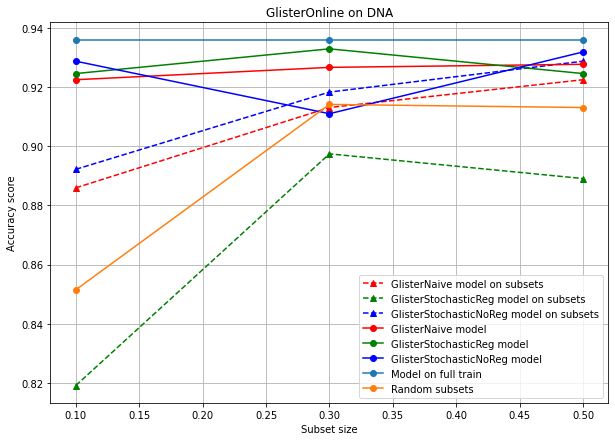

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.plot([0.1, 0.3, 0.5], glister_naive_subsets_test_acc, label = 'GlisterNaive model on subsets', linestyle = "--", color = "red", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_stoch_reg_subsets_test_acc, label = 'GlisterStochasticReg model on subsets', linestyle = "--", color = "green", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_stoch_no_reg_subsets_test_acc, label = 'GlisterStochasticNoReg model on subsets', linestyle = "--", color = "blue", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_naive_acc, label = 'GlisterNaive model', color = "red", marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_stoch_reg_acc, label = 'GlisterStochasticReg model', color = "green", marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_stoch_no_reg_acc, label = 'GlisterStochasticNoReg model', color = "blue", marker = "o")
ax.plot([0.1, 0.3, 0.5], [full_train_acc] * 3, label = 'Model on full train', marker = "o")
ax.plot([0.1, 0.3, 0.5], random_subsets_acc, label = 'Random subsets', marker = "o")
#ax.plot([0.1, 0.3, 0.5], [rand_pred_test_acc] * 3, label = 'Random predictions')
plt.grid()
plt.title('GlisterOnline on DNA')
plt.xlabel("Subset size")
plt.ylabel("Accuracy score")
plt.legend();

### Save

In [104]:
data = np.array([glister_naive_subsets_test_acc, glister_stoch_reg_subsets_test_acc, glister_stoch_no_reg_subsets_test_acc, glister_naive_acc, glister_stoch_reg_acc, glister_stoch_no_reg_acc, [full_train_acc[0]]*3, random_subsets_acc])
labels = ['GlisterNaive model on subsets', 'GlisterStochasticReg model on subsets', 'GlisterStochasticNoReg model on subsets', 'GlisterNaive model', 'GlisterStochasticReg model', 'GlisterStochasticNoReg model', 'Model on full train', 'Random subsets']

In [109]:
data = pd.DataFrame(data, index=labels)
data.to_csv("acc_dna", header=None)

In [86]:
np.savetxt('acc_dna.out', data, delimiter=',') 

## Experiments on `Digits`

In [38]:
from GlisterImage.GlisterImage import GlisterOnlineImage

In [39]:
torch.manual_seed(42)
np.random.seed(42)

### Data

In [40]:
class DIGITS_DATA(torch_data.Dataset):
    
    def __init__(self, X, y):
        super(DIGITS_DATA, self).__init__()
        X = X.reshape(-1, 8, 8)
        X = np.expand_dims(X, 1)
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long) 
    
    def __len__(self):
        return list(self.X.size())[0]
    
    def __getitem__(self, idx):
        return (self.X[idx], self.y[idx])

In [41]:
from sklearn.datasets import load_digits

digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]
test_size = digits_test.shape[0]

input_size = 8*8
classes_n = 10

In [42]:
fullset = DIGITS_DATA(np.array(digits_train), np.array(targets_train))
valset = DIGITS_DATA(np.array(digits_train), np.array(targets_train))
testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

### Model

In [35]:
class MnistNet(torch.nn.Module):
    def __init__(self):
        super(MnistNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, 3, 1)
        self.conv2 = torch.nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = torch.nn.Dropout2d(0.25)
        self.dropout2 = torch.nn.Dropout2d(0.5)
        self.fc1 = torch.nn.Linear(256, 128)
        self.fc2 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.nn.functional.relu(x)
        x = self.conv2(x)
        x = torch.nn.functional.relu(x)
        x = torch.nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout2(x)
        output = self.fc2(x)
        return output

In [52]:
class MnistNetSimple(torch.nn.Module):
    def __init__(self):
        super(MnistNetSimple, self).__init__()
        self.conv = torch.nn.Conv2d(1, 16, 3)
        self.maxpool = torch.nn.MaxPool2d(2)
        self.dropout = torch.nn.Dropout2d(0.2)
        self.fc = torch.nn.Linear(144, 10)

    def forward(self, x):
        x = self.conv(x)
        x = torch.nn.functional.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        x = torch.nn.functional.relu(x)
        return x

### GlisterImage (GlisterNaive for images)

In [36]:
glister_image_acc = []
glister_image_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister_image = GlisterOnlineImage(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.3,
    trn_batch_size = 20,
    val_batch_size = 20,
    tst_batch_size = 20,
    dss_batch_size = 20,
    model = MnistNet(),
    num_epochs = 200,
    learning_rate = 1.0,
    num_classes = 10,
    n_channels = 1,
    bud = k * len(fullset),
    lam = 0.9)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister_image.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_image_acc.append(tst_acc)
    glister_image_indexes.append(idxs)

Epoch: 1 SubsetTrn,FullTrn,ValLoss: 2.299802303314209 110.67126822471619 48.43223690986633
selEpoch: 0, Starting Selection: 2021-03-19 22:33:32.860940
numSelected: 0 Time for 1: 0.01140284538269043


/Users/vladimiromelyusik/glister_online/final_experiments/GlisterImage/set_function_image.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


selEpoch: 0, Selection Ended at: 2021-03-19 22:33:34.211371
Epoch: 2 SubsetTrn,FullTrn,ValLoss: 13.902888059616089 111.09011268615723 48.68887376785278
selEpoch: 1, Starting Selection: 2021-03-19 22:33:34.299205
numSelected: 0 Time for 1: 0.010202884674072266
selEpoch: 1, Selection Ended at: 2021-03-19 22:33:35.597303
Epoch: 3 SubsetTrn,FullTrn,ValLoss: 13.953189134597778 110.74860692024231 48.49194860458374
selEpoch: 2, Starting Selection: 2021-03-19 22:33:35.684879
numSelected: 0 Time for 1: 0.010104179382324219
selEpoch: 2, Selection Ended at: 2021-03-19 22:33:36.973615
Epoch: 4 SubsetTrn,FullTrn,ValLoss: 13.873978614807129 110.78595328330994 48.69761276245117
selEpoch: 3, Starting Selection: 2021-03-19 22:33:37.060948
numSelected: 0 Time for 1: 0.010052919387817383
selEpoch: 3, Selection Ended at: 2021-03-19 22:33:38.404577
Epoch: 5 SubsetTrn,FullTrn,ValLoss: 13.930100440979004 110.97587060928345 48.89213037490845
selEpoch: 4, Starting Selection: 2021-03-19 22:33:38.492324
numSelec

selEpoch: 32, Selection Ended at: 2021-03-19 22:34:19.485233
Epoch: 34 SubsetTrn,FullTrn,ValLoss: 13.781198263168335 111.68955755233765 48.55831217765808
selEpoch: 33, Starting Selection: 2021-03-19 22:34:19.575135
numSelected: 0 Time for 1: 0.010170221328735352
selEpoch: 33, Selection Ended at: 2021-03-19 22:34:20.948330
Epoch: 35 SubsetTrn,FullTrn,ValLoss: 13.887282133102417 111.20574975013733 48.401570320129395
selEpoch: 34, Starting Selection: 2021-03-19 22:34:21.035480
numSelected: 0 Time for 1: 0.011672019958496094
selEpoch: 34, Selection Ended at: 2021-03-19 22:34:22.553124
Epoch: 36 SubsetTrn,FullTrn,ValLoss: 13.824198722839355 111.0621075630188 48.342700481414795
selEpoch: 35, Starting Selection: 2021-03-19 22:34:22.655194
numSelected: 0 Time for 1: 0.011021137237548828
selEpoch: 35, Selection Ended at: 2021-03-19 22:34:24.091342
Epoch: 37 SubsetTrn,FullTrn,ValLoss: 13.890868425369263 110.78905391693115 48.384923219680786
selEpoch: 36, Starting Selection: 2021-03-19 22:34:24.1

selEpoch: 64, Selection Ended at: 2021-03-19 22:35:04.930836
Epoch: 66 SubsetTrn,FullTrn,ValLoss: 13.841105461120605 110.83153438568115 48.679001569747925
selEpoch: 65, Starting Selection: 2021-03-19 22:35:05.018518
numSelected: 0 Time for 1: 0.010102987289428711
selEpoch: 65, Selection Ended at: 2021-03-19 22:35:06.313028
Epoch: 67 SubsetTrn,FullTrn,ValLoss: 13.801977634429932 110.95876431465149 48.573087215423584
selEpoch: 66, Starting Selection: 2021-03-19 22:35:06.400623
numSelected: 0 Time for 1: 0.010080814361572266
selEpoch: 66, Selection Ended at: 2021-03-19 22:35:07.695632
Epoch: 68 SubsetTrn,FullTrn,ValLoss: 13.841257095336914 110.80554819107056 48.77073788642883
selEpoch: 67, Starting Selection: 2021-03-19 22:35:07.783507
numSelected: 0 Time for 1: 0.010053873062133789
selEpoch: 67, Selection Ended at: 2021-03-19 22:35:09.075760
Epoch: 69 SubsetTrn,FullTrn,ValLoss: 13.809013366699219 110.88625597953796 48.811484575271606
selEpoch: 68, Starting Selection: 2021-03-19 22:35:09.

selEpoch: 96, Selection Ended at: 2021-03-19 22:35:50.292064
Epoch: 98 SubsetTrn,FullTrn,ValLoss: 13.794928550720215 111.5673360824585 48.5844943523407
selEpoch: 97, Starting Selection: 2021-03-19 22:35:50.380097
numSelected: 0 Time for 1: 0.01014399528503418
selEpoch: 97, Selection Ended at: 2021-03-19 22:35:51.679258
Epoch: 99 SubsetTrn,FullTrn,ValLoss: 13.767436742782593 111.94507479667664 48.803539991378784
selEpoch: 98, Starting Selection: 2021-03-19 22:35:51.767094
numSelected: 0 Time for 1: 0.010222196578979492
selEpoch: 98, Selection Ended at: 2021-03-19 22:35:53.098433
Epoch: 100 SubsetTrn,FullTrn,ValLoss: 13.88138222694397 111.7926983833313 48.47238254547119
selEpoch: 99, Starting Selection: 2021-03-19 22:35:53.186561
numSelected: 0 Time for 1: 0.010127782821655273
selEpoch: 99, Selection Ended at: 2021-03-19 22:35:54.482747
Epoch: 101 SubsetTrn,FullTrn,ValLoss: 13.833889484405518 111.6359601020813 48.6825897693634
selEpoch: 100, Starting Selection: 2021-03-19 22:35:54.571113

selEpoch: 127, Selection Ended at: 2021-03-19 22:36:34.361965
Epoch: 129 SubsetTrn,FullTrn,ValLoss: 13.884277820587158 111.21739673614502 48.32412004470825
selEpoch: 128, Starting Selection: 2021-03-19 22:36:34.450637
numSelected: 0 Time for 1: 0.01050114631652832
selEpoch: 128, Selection Ended at: 2021-03-19 22:36:35.785447
Epoch: 130 SubsetTrn,FullTrn,ValLoss: 13.908224105834961 111.34126782417297 48.398651361465454
selEpoch: 129, Starting Selection: 2021-03-19 22:36:35.874333
numSelected: 0 Time for 1: 0.011313199996948242
selEpoch: 129, Selection Ended at: 2021-03-19 22:36:37.276888
Epoch: 131 SubsetTrn,FullTrn,ValLoss: 13.910271406173706 111.16272974014282 48.40625333786011
selEpoch: 130, Starting Selection: 2021-03-19 22:36:37.377897
numSelected: 0 Time for 1: 0.010296106338500977
selEpoch: 130, Selection Ended at: 2021-03-19 22:36:38.730490
Epoch: 132 SubsetTrn,FullTrn,ValLoss: 13.861362218856812 111.10491251945496 48.37400960922241
selEpoch: 131, Starting Selection: 2021-03-19 

selEpoch: 158, Selection Ended at: 2021-03-19 22:37:18.759039
Epoch: 160 SubsetTrn,FullTrn,ValLoss: 13.829998254776001 111.47388792037964 48.40520524978638
selEpoch: 159, Starting Selection: 2021-03-19 22:37:18.849114
numSelected: 0 Time for 1: 0.010283946990966797
selEpoch: 159, Selection Ended at: 2021-03-19 22:37:20.161821
Epoch: 161 SubsetTrn,FullTrn,ValLoss: 13.773340463638306 111.74891257286072 48.32288694381714
selEpoch: 160, Starting Selection: 2021-03-19 22:37:20.251301
numSelected: 0 Time for 1: 0.010204792022705078
selEpoch: 160, Selection Ended at: 2021-03-19 22:37:21.588054
Epoch: 162 SubsetTrn,FullTrn,ValLoss: 13.681005954742432 112.14845991134644 48.31721472740173
selEpoch: 161, Starting Selection: 2021-03-19 22:37:21.680179
numSelected: 0 Time for 1: 0.010615110397338867
selEpoch: 161, Selection Ended at: 2021-03-19 22:37:23.012325
Epoch: 163 SubsetTrn,FullTrn,ValLoss: 13.853228569030762 111.71891069412231 48.43838167190552
selEpoch: 162, Starting Selection: 2021-03-19 

selEpoch: 189, Selection Ended at: 2021-03-19 22:38:03.741188
Epoch: 191 SubsetTrn,FullTrn,ValLoss: 13.790512561798096 111.26488184928894 48.785258531570435
selEpoch: 190, Starting Selection: 2021-03-19 22:38:03.837900
numSelected: 0 Time for 1: 0.010749101638793945
selEpoch: 190, Selection Ended at: 2021-03-19 22:38:05.291235
Epoch: 192 SubsetTrn,FullTrn,ValLoss: 13.783134460449219 111.51879096031189 48.70161819458008
selEpoch: 191, Starting Selection: 2021-03-19 22:38:05.393533
numSelected: 0 Time for 1: 0.011739253997802734
selEpoch: 191, Selection Ended at: 2021-03-19 22:38:06.786008
Epoch: 193 SubsetTrn,FullTrn,ValLoss: 13.852254629135132 111.32143020629883 48.529181718826294
selEpoch: 192, Starting Selection: 2021-03-19 22:38:06.891357
numSelected: 0 Time for 1: 0.0115509033203125
selEpoch: 192, Selection Ended at: 2021-03-19 22:38:08.365850
Epoch: 194 SubsetTrn,FullTrn,ValLoss: 13.858447313308716 111.10513925552368 48.44909596443176
selEpoch: 193, Starting Selection: 2021-03-19 

numSelected: 0 Time for 1: 0.01004481315612793
selEpoch: 20, Selection Ended at: 2021-03-19 22:39:39.596867
Epoch: 22 SubsetTrn,FullTrn,ValLoss: 45.83962941169739 111.58007717132568 49.24035024642944
selEpoch: 21, Starting Selection: 2021-03-19 22:39:39.729333
numSelected: 0 Time for 1: 0.01015615463256836
selEpoch: 21, Selection Ended at: 2021-03-19 22:39:43.445036
Epoch: 23 SubsetTrn,FullTrn,ValLoss: 45.996623039245605 111.38308763504028 48.991365909576416
selEpoch: 22, Starting Selection: 2021-03-19 22:39:43.577096
numSelected: 0 Time for 1: 0.010085821151733398
selEpoch: 22, Selection Ended at: 2021-03-19 22:39:47.309057
Epoch: 24 SubsetTrn,FullTrn,ValLoss: 46.081766843795776 111.15182375907898 48.82353138923645
selEpoch: 23, Starting Selection: 2021-03-19 22:39:47.440946
numSelected: 0 Time for 1: 0.010162115097045898
selEpoch: 23, Selection Ended at: 2021-03-19 22:39:51.325500
Epoch: 25 SubsetTrn,FullTrn,ValLoss: 45.98742961883545 111.27072048187256 49.07409358024597
selEpoch: 24

numSelected: 0 Time for 1: 0.010493993759155273
selEpoch: 52, Selection Ended at: 2021-03-19 22:41:46.667769
Epoch: 54 SubsetTrn,FullTrn,ValLoss: 46.179630517959595 111.21807646751404 48.33635354042053
selEpoch: 53, Starting Selection: 2021-03-19 22:41:46.799818
numSelected: 0 Time for 1: 0.01045083999633789
selEpoch: 53, Selection Ended at: 2021-03-19 22:41:50.544636
Epoch: 55 SubsetTrn,FullTrn,ValLoss: 46.24762678146362 110.85718822479248 48.30229139328003
selEpoch: 54, Starting Selection: 2021-03-19 22:41:50.677055
numSelected: 0 Time for 1: 0.010091066360473633
selEpoch: 54, Selection Ended at: 2021-03-19 22:41:54.424139
Epoch: 56 SubsetTrn,FullTrn,ValLoss: 46.275145292282104 110.89677500724792 48.33066153526306
selEpoch: 55, Starting Selection: 2021-03-19 22:41:54.557989
numSelected: 0 Time for 1: 0.01010894775390625
selEpoch: 55, Selection Ended at: 2021-03-19 22:41:58.329509
Epoch: 57 SubsetTrn,FullTrn,ValLoss: 46.37429594993591 111.01324391365051 48.312180519104004
selEpoch: 56

numSelected: 0 Time for 1: 0.010183334350585938
selEpoch: 84, Selection Ended at: 2021-03-19 22:43:52.422165
Epoch: 86 SubsetTrn,FullTrn,ValLoss: 46.26694989204407 110.85047149658203 48.76325988769531
selEpoch: 85, Starting Selection: 2021-03-19 22:43:52.554055
numSelected: 0 Time for 1: 0.010130882263183594
selEpoch: 85, Selection Ended at: 2021-03-19 22:43:56.264567
Epoch: 87 SubsetTrn,FullTrn,ValLoss: 46.321714878082275 110.8429434299469 48.604697942733765
selEpoch: 86, Starting Selection: 2021-03-19 22:43:56.396250
numSelected: 0 Time for 1: 0.010175943374633789
selEpoch: 86, Selection Ended at: 2021-03-19 22:44:00.144404
Epoch: 88 SubsetTrn,FullTrn,ValLoss: 46.2162823677063 111.00584506988525 48.773662090301514
selEpoch: 87, Starting Selection: 2021-03-19 22:44:00.299821
numSelected: 0 Time for 1: 0.011579036712646484
selEpoch: 87, Selection Ended at: 2021-03-19 22:44:04.323029
Epoch: 89 SubsetTrn,FullTrn,ValLoss: 46.29982018470764 110.74742364883423 48.56271958351135
selEpoch: 88

selEpoch: 115, Selection Ended at: 2021-03-19 22:45:53.050005
Epoch: 117 SubsetTrn,FullTrn,ValLoss: 46.17545032501221 111.11911630630493 48.86045002937317
selEpoch: 116, Starting Selection: 2021-03-19 22:45:53.182329
numSelected: 0 Time for 1: 0.010363101959228516
selEpoch: 116, Selection Ended at: 2021-03-19 22:45:56.929383
Epoch: 118 SubsetTrn,FullTrn,ValLoss: 46.09954905509949 110.86572766304016 48.744895696640015
selEpoch: 117, Starting Selection: 2021-03-19 22:45:57.061670
numSelected: 0 Time for 1: 0.010190248489379883
selEpoch: 117, Selection Ended at: 2021-03-19 22:46:00.816899
Epoch: 119 SubsetTrn,FullTrn,ValLoss: 46.16076874732971 111.07831907272339 48.76347804069519
selEpoch: 118, Starting Selection: 2021-03-19 22:46:00.948957
numSelected: 0 Time for 1: 0.010262012481689453
selEpoch: 118, Selection Ended at: 2021-03-19 22:46:04.678221
Epoch: 120 SubsetTrn,FullTrn,ValLoss: 46.18453884124756 110.90956950187683 48.694502115249634
selEpoch: 119, Starting Selection: 2021-03-19 22

selEpoch: 146, Selection Ended at: 2021-03-19 22:47:53.981519
Epoch: 148 SubsetTrn,FullTrn,ValLoss: 46.336238861083984 110.78598833084106 48.7693567276001
selEpoch: 147, Starting Selection: 2021-03-19 22:47:54.114254
numSelected: 0 Time for 1: 0.010132074356079102
selEpoch: 147, Selection Ended at: 2021-03-19 22:47:57.892507
Epoch: 149 SubsetTrn,FullTrn,ValLoss: 46.275306224823 110.85547518730164 48.55032205581665
selEpoch: 148, Starting Selection: 2021-03-19 22:47:58.024742
numSelected: 0 Time for 1: 0.01028895378112793
selEpoch: 148, Selection Ended at: 2021-03-19 22:48:01.772291
Epoch: 150 SubsetTrn,FullTrn,ValLoss: 46.287108182907104 110.84456992149353 48.58837819099426
selEpoch: 149, Starting Selection: 2021-03-19 22:48:01.904706
numSelected: 0 Time for 1: 0.010103940963745117
selEpoch: 149, Selection Ended at: 2021-03-19 22:48:05.621051
Epoch: 151 SubsetTrn,FullTrn,ValLoss: 46.28547382354736 111.03311777114868 48.53626275062561
selEpoch: 150, Starting Selection: 2021-03-19 22:48:

selEpoch: 177, Selection Ended at: 2021-03-19 22:49:55.537783
Epoch: 179 SubsetTrn,FullTrn,ValLoss: 46.339550495147705 110.74897575378418 48.745095014572144
selEpoch: 178, Starting Selection: 2021-03-19 22:49:55.669907
numSelected: 0 Time for 1: 0.010153055191040039
selEpoch: 178, Selection Ended at: 2021-03-19 22:49:59.392163
Epoch: 180 SubsetTrn,FullTrn,ValLoss: 46.27263879776001 110.8412184715271 48.67892622947693
selEpoch: 179, Starting Selection: 2021-03-19 22:49:59.525123
numSelected: 0 Time for 1: 0.010244131088256836
selEpoch: 179, Selection Ended at: 2021-03-19 22:50:03.237703
Epoch: 181 SubsetTrn,FullTrn,ValLoss: 46.3015501499176 110.88880467414856 48.54696583747864
selEpoch: 180, Starting Selection: 2021-03-19 22:50:03.370244
numSelected: 0 Time for 1: 0.010125160217285156
selEpoch: 180, Selection Ended at: 2021-03-19 22:50:07.112675
Epoch: 182 SubsetTrn,FullTrn,ValLoss: 46.20781064033508 111.1917634010315 48.61155986785889
selEpoch: 181, Starting Selection: 2021-03-19 22:50

selEpoch: 7, Selection Ended at: 2021-03-19 22:52:12.553123
Epoch: 9 SubsetTrn,FullTrn,ValLoss: 76.13545513153076 110.75210404396057 48.665568113327026
selEpoch: 8, Starting Selection: 2021-03-19 22:52:12.737704
numSelected: 0 Time for 1: 0.011255979537963867
selEpoch: 8, Selection Ended at: 2021-03-19 22:52:19.026360
Epoch: 10 SubsetTrn,FullTrn,ValLoss: 76.40306758880615 110.79627227783203 48.512911319732666
selEpoch: 9, Starting Selection: 2021-03-19 22:52:19.199355
numSelected: 0 Time for 1: 0.010111093521118164
selEpoch: 9, Selection Ended at: 2021-03-19 22:52:25.370527
Epoch: 11 SubsetTrn,FullTrn,ValLoss: 76.39408707618713 110.5015299320221 48.62581753730774
selEpoch: 10, Starting Selection: 2021-03-19 22:52:25.548891
numSelected: 0 Time for 1: 0.01014399528503418
selEpoch: 10, Selection Ended at: 2021-03-19 22:52:31.778737
Epoch: 12 SubsetTrn,FullTrn,ValLoss: 76.33061408996582 110.61761665344238 48.48473525047302
selEpoch: 11, Starting Selection: 2021-03-19 22:52:31.951601
numSel

numSelected: 0 Time for 1: 0.010164976119995117
selEpoch: 39, Selection Ended at: 2021-03-19 22:55:36.860282
Epoch: 41 SubsetTrn,FullTrn,ValLoss: 75.89145135879517 111.04826283454895 48.82353234291077
selEpoch: 40, Starting Selection: 2021-03-19 22:55:37.033215
numSelected: 0 Time for 1: 0.010210275650024414
selEpoch: 40, Selection Ended at: 2021-03-19 22:55:43.153645
Epoch: 42 SubsetTrn,FullTrn,ValLoss: 76.11575174331665 110.8243420124054 48.847784996032715
selEpoch: 41, Starting Selection: 2021-03-19 22:55:43.326034
numSelected: 0 Time for 1: 0.010161161422729492
selEpoch: 41, Selection Ended at: 2021-03-19 22:55:49.666204
Epoch: 43 SubsetTrn,FullTrn,ValLoss: 76.14702320098877 110.62064480781555 48.73907279968262
selEpoch: 42, Starting Selection: 2021-03-19 22:55:49.847030
numSelected: 0 Time for 1: 0.01077580451965332
selEpoch: 42, Selection Ended at: 2021-03-19 22:55:55.988893
Epoch: 44 SubsetTrn,FullTrn,ValLoss: 76.15339589118958 110.66864037513733 48.47671842575073
selEpoch: 43, 

numSelected: 0 Time for 1: 0.010084867477416992
selEpoch: 71, Selection Ended at: 2021-03-19 22:58:59.001155
Epoch: 73 SubsetTrn,FullTrn,ValLoss: 76.07764101028442 110.82511186599731 48.7252151966095
selEpoch: 72, Starting Selection: 2021-03-19 22:58:59.173589
numSelected: 0 Time for 1: 0.01003885269165039
selEpoch: 72, Selection Ended at: 2021-03-19 22:59:05.296026
Epoch: 74 SubsetTrn,FullTrn,ValLoss: 76.22335195541382 110.748051404953 48.52937912940979
selEpoch: 73, Starting Selection: 2021-03-19 22:59:05.468531
numSelected: 0 Time for 1: 0.010083198547363281
selEpoch: 73, Selection Ended at: 2021-03-19 22:59:11.588956
Epoch: 75 SubsetTrn,FullTrn,ValLoss: 76.29560208320618 110.8570601940155 48.78984761238098
selEpoch: 74, Starting Selection: 2021-03-19 22:59:11.762222
numSelected: 0 Time for 1: 0.010133981704711914
selEpoch: 74, Selection Ended at: 2021-03-19 22:59:17.882653
Epoch: 76 SubsetTrn,FullTrn,ValLoss: 76.36072158813477 110.83612298965454 48.58486557006836
selEpoch: 75, Star

numSelected: 0 Time for 1: 0.010158777236938477
selEpoch: 103, Selection Ended at: 2021-03-19 23:02:21.326732
Epoch: 105 SubsetTrn,FullTrn,ValLoss: 76.3753809928894 110.67634177207947 48.494444847106934
selEpoch: 104, Starting Selection: 2021-03-19 23:02:21.499312
numSelected: 0 Time for 1: 0.010181188583374023
selEpoch: 104, Selection Ended at: 2021-03-19 23:02:27.626373
Epoch: 106 SubsetTrn,FullTrn,ValLoss: 76.49783897399902 110.81576156616211 48.53610849380493
selEpoch: 105, Starting Selection: 2021-03-19 23:02:27.799105
numSelected: 0 Time for 1: 0.01004791259765625
selEpoch: 105, Selection Ended at: 2021-03-19 23:02:33.980174
Epoch: 107 SubsetTrn,FullTrn,ValLoss: 76.30686140060425 111.02675485610962 48.603835105895996
selEpoch: 106, Starting Selection: 2021-03-19 23:02:34.152876
numSelected: 0 Time for 1: 0.010052919387817383
selEpoch: 106, Selection Ended at: 2021-03-19 23:02:40.260714
Epoch: 108 SubsetTrn,FullTrn,ValLoss: 76.39881205558777 110.82026481628418 48.66131138801575
se

numSelected: 0 Time for 1: 0.010113000869750977
selEpoch: 134, Selection Ended at: 2021-03-19 23:05:38.241493
Epoch: 136 SubsetTrn,FullTrn,ValLoss: 76.33631324768066 111.33789467811584 49.05353093147278
selEpoch: 135, Starting Selection: 2021-03-19 23:05:38.418314
numSelected: 0 Time for 1: 0.010107040405273438
selEpoch: 135, Selection Ended at: 2021-03-19 23:05:44.661435
Epoch: 137 SubsetTrn,FullTrn,ValLoss: 76.12181234359741 110.82953333854675 48.806540966033936
selEpoch: 136, Starting Selection: 2021-03-19 23:05:44.835968
numSelected: 0 Time for 1: 0.010109901428222656
selEpoch: 136, Selection Ended at: 2021-03-19 23:05:50.990842
Epoch: 138 SubsetTrn,FullTrn,ValLoss: 76.32822370529175 110.76469445228577 48.55707287788391
selEpoch: 137, Starting Selection: 2021-03-19 23:05:51.164273
numSelected: 0 Time for 1: 0.010218381881713867
selEpoch: 137, Selection Ended at: 2021-03-19 23:05:57.334374
Epoch: 139 SubsetTrn,FullTrn,ValLoss: 76.42323017120361 110.65518569946289 48.55047106742859
s

numSelected: 0 Time for 1: 0.010734081268310547
selEpoch: 165, Selection Ended at: 2021-03-19 23:08:56.100833
Epoch: 167 SubsetTrn,FullTrn,ValLoss: 76.23538184165955 110.98831081390381 48.932952642440796
selEpoch: 166, Starting Selection: 2021-03-19 23:08:56.273024
numSelected: 0 Time for 1: 0.010152816772460938
selEpoch: 166, Selection Ended at: 2021-03-19 23:09:02.348827
Epoch: 168 SubsetTrn,FullTrn,ValLoss: 76.26300525665283 111.2810869216919 48.933340072631836
selEpoch: 167, Starting Selection: 2021-03-19 23:09:02.521251
numSelected: 0 Time for 1: 0.010115861892700195
selEpoch: 167, Selection Ended at: 2021-03-19 23:09:08.592548
Epoch: 169 SubsetTrn,FullTrn,ValLoss: 76.1413061618805 111.2654197216034 49.01020288467407
selEpoch: 168, Starting Selection: 2021-03-19 23:09:08.764595
numSelected: 0 Time for 1: 0.010151863098144531
selEpoch: 168, Selection Ended at: 2021-03-19 23:09:14.871823
Epoch: 170 SubsetTrn,FullTrn,ValLoss: 76.28380513191223 110.81560611724854 48.71927285194397
sel

numSelected: 0 Time for 1: 0.010174274444580078
selEpoch: 196, Selection Ended at: 2021-03-19 23:12:12.680714
Epoch: 198 SubsetTrn,FullTrn,ValLoss: 76.41271662712097 110.73778772354126 48.53314447402954
selEpoch: 197, Starting Selection: 2021-03-19 23:12:12.853048
numSelected: 0 Time for 1: 0.010085821151733398
selEpoch: 197, Selection Ended at: 2021-03-19 23:12:18.951959
Epoch: 199 SubsetTrn,FullTrn,ValLoss: 76.52021837234497 110.64899349212646 48.52788805961609
selEpoch: 198, Starting Selection: 2021-03-19 23:12:19.124351
numSelected: 0 Time for 1: 0.010037899017333984
selEpoch: 198, Selection Ended at: 2021-03-19 23:12:25.240325
Epoch: 200 SubsetTrn,FullTrn,ValLoss: 76.44556665420532 110.73416018486023 48.4962375164032
selEpoch: 199, Starting Selection: 2021-03-19 23:12:25.413422
numSelected: 0 Time for 1: 0.01060628890991211
selEpoch: 199, Selection Ended at: 2021-03-19 23:12:31.846175
SelectionRun---------------------------------
Final SubsetTrn and FullTrn Loss: 78.23217248916626

In [53]:
simple_glister_image_acc = []
simple_glister_image_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister_image = GlisterOnlineImage(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.3,
    trn_batch_size = 20,
    val_batch_size = 20,
    tst_batch_size = 20,
    dss_batch_size = 20,
    model = MnistNetSimple(),
    num_epochs = 200,
    learning_rate = 1.0,
    num_classes = 10,
    n_channels = 1,
    bud = k * len(fullset),
    lam = 0.9)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister_image.random_greedy_train_model_online_taylor(np.arange(20))
    
    simple_glister_image_acc.append(tst_acc)
    simple_glister_image_indexes.append(idxs)

Epoch: 1 SubsetTrn,FullTrn,ValLoss: 2.291106939315796 111.19574284553528 48.31893849372864
selEpoch: 0, Starting Selection: 2021-03-21 00:09:46.838309
numSelected: 0 Time for 1: 0.0025758743286132812


/Users/vladimiromelyusik/glister_online/final_experiments/GlisterImage/set_function_image.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.N_trn = len(trainset)


selEpoch: 0, Selection Ended at: 2021-03-21 00:09:47.112544
Epoch: 2 SubsetTrn,FullTrn,ValLoss: 13.881253957748413 110.8173439502716 48.19030213356018
selEpoch: 1, Starting Selection: 2021-03-21 00:09:47.149944
numSelected: 0 Time for 1: 0.0019173622131347656
selEpoch: 1, Selection Ended at: 2021-03-21 00:09:47.417902
Epoch: 3 SubsetTrn,FullTrn,ValLoss: 13.803179025650024 111.0148663520813 48.300060987472534
selEpoch: 2, Starting Selection: 2021-03-21 00:09:47.456259
numSelected: 0 Time for 1: 0.0023810863494873047
selEpoch: 2, Selection Ended at: 2021-03-21 00:09:47.736372
Epoch: 4 SubsetTrn,FullTrn,ValLoss: 13.832423448562622 111.43070363998413 48.19583749771118
selEpoch: 3, Starting Selection: 2021-03-21 00:09:47.773574
numSelected: 0 Time for 1: 0.0019230842590332031
selEpoch: 3, Selection Ended at: 2021-03-21 00:09:48.038934
Epoch: 5 SubsetTrn,FullTrn,ValLoss: 13.794101476669312 110.76742196083069 48.1340446472168
selEpoch: 4, Starting Selection: 2021-03-21 00:09:48.075822
numSele

selEpoch: 32, Selection Ended at: 2021-03-21 00:09:57.374889
Epoch: 34 SubsetTrn,FullTrn,ValLoss: 13.787349700927734 110.19128561019897 47.971662759780884
selEpoch: 33, Starting Selection: 2021-03-21 00:09:57.414863
numSelected: 0 Time for 1: 0.001954793930053711
selEpoch: 33, Selection Ended at: 2021-03-21 00:09:57.694091
Epoch: 35 SubsetTrn,FullTrn,ValLoss: 13.717377424240112 110.11150312423706 47.96496844291687
selEpoch: 34, Starting Selection: 2021-03-21 00:09:57.731320
numSelected: 0 Time for 1: 0.0018451213836669922
selEpoch: 34, Selection Ended at: 2021-03-21 00:09:57.995156
Epoch: 36 SubsetTrn,FullTrn,ValLoss: 13.759144306182861 109.99427390098572 47.965880393981934
selEpoch: 35, Starting Selection: 2021-03-21 00:09:58.032212
numSelected: 0 Time for 1: 0.0018799304962158203
selEpoch: 35, Selection Ended at: 2021-03-21 00:09:58.299232
Epoch: 37 SubsetTrn,FullTrn,ValLoss: 13.680456638336182 110.08195185661316 47.89795255661011
selEpoch: 36, Starting Selection: 2021-03-21 00:09:58

selEpoch: 64, Selection Ended at: 2021-03-21 00:10:07.062649
Epoch: 66 SubsetTrn,FullTrn,ValLoss: 12.16647720336914 106.51547455787659 44.61187982559204
selEpoch: 65, Starting Selection: 2021-03-21 00:10:07.099720
numSelected: 0 Time for 1: 0.0021538734436035156
selEpoch: 65, Selection Ended at: 2021-03-21 00:10:07.365312
Epoch: 67 SubsetTrn,FullTrn,ValLoss: 12.247942447662354 105.10611581802368 44.158122301101685
selEpoch: 66, Starting Selection: 2021-03-21 00:10:07.402522
numSelected: 0 Time for 1: 0.001870870590209961
selEpoch: 66, Selection Ended at: 2021-03-21 00:10:07.667708
Epoch: 68 SubsetTrn,FullTrn,ValLoss: 12.384989142417908 104.45135366916656 43.97191095352173
selEpoch: 67, Starting Selection: 2021-03-21 00:10:07.706215
numSelected: 0 Time for 1: 0.0019409656524658203
selEpoch: 67, Selection Ended at: 2021-03-21 00:10:07.971325
Epoch: 69 SubsetTrn,FullTrn,ValLoss: 12.10094928741455 105.26808214187622 44.105992555618286
selEpoch: 68, Starting Selection: 2021-03-21 00:10:08.0

selEpoch: 96, Selection Ended at: 2021-03-21 00:10:16.854966
Epoch: 98 SubsetTrn,FullTrn,ValLoss: 10.921112537384033 99.4431003332138 40.83988583087921
selEpoch: 97, Starting Selection: 2021-03-21 00:10:16.892173
numSelected: 0 Time for 1: 0.0019659996032714844
selEpoch: 97, Selection Ended at: 2021-03-21 00:10:17.156772
Epoch: 99 SubsetTrn,FullTrn,ValLoss: 10.905103206634521 98.4644695520401 40.31820344924927
selEpoch: 98, Starting Selection: 2021-03-21 00:10:17.194289
numSelected: 0 Time for 1: 0.0019156932830810547
selEpoch: 98, Selection Ended at: 2021-03-21 00:10:17.461339
Epoch: 100 SubsetTrn,FullTrn,ValLoss: 11.059202432632446 97.18487513065338 40.0509979724884
selEpoch: 99, Starting Selection: 2021-03-21 00:10:17.498658
numSelected: 0 Time for 1: 0.001905202865600586
selEpoch: 99, Selection Ended at: 2021-03-21 00:10:17.763095
Epoch: 101 SubsetTrn,FullTrn,ValLoss: 11.17012345790863 96.97694182395935 40.291237235069275
selEpoch: 100, Starting Selection: 2021-03-21 00:10:17.80195

selEpoch: 127, Selection Ended at: 2021-03-21 00:10:26.302776
Epoch: 129 SubsetTrn,FullTrn,ValLoss: 10.211022138595581 90.84543788433075 37.88883137702942
selEpoch: 128, Starting Selection: 2021-03-21 00:10:26.340304
numSelected: 0 Time for 1: 0.0019240379333496094
selEpoch: 128, Selection Ended at: 2021-03-21 00:10:26.605345
Epoch: 130 SubsetTrn,FullTrn,ValLoss: 9.510833621025085 91.8436986207962 38.234127163887024
selEpoch: 129, Starting Selection: 2021-03-21 00:10:26.642688
numSelected: 0 Time for 1: 0.0018658638000488281
selEpoch: 129, Selection Ended at: 2021-03-21 00:10:26.909187
Epoch: 131 SubsetTrn,FullTrn,ValLoss: 9.952688932418823 92.03941762447357 39.20870041847229
selEpoch: 130, Starting Selection: 2021-03-21 00:10:26.946215
numSelected: 0 Time for 1: 0.0019559860229492188
selEpoch: 130, Selection Ended at: 2021-03-21 00:10:27.210474
Epoch: 132 SubsetTrn,FullTrn,ValLoss: 9.385370016098022 90.97869098186493 38.622050404548645
selEpoch: 131, Starting Selection: 2021-03-21 00:

selEpoch: 158, Selection Ended at: 2021-03-21 00:10:35.735754
Epoch: 160 SubsetTrn,FullTrn,ValLoss: 9.21028470993042 80.59425091743469 35.64071583747864
selEpoch: 159, Starting Selection: 2021-03-21 00:10:35.772903
numSelected: 0 Time for 1: 0.002269744873046875
selEpoch: 159, Selection Ended at: 2021-03-21 00:10:36.057768
Epoch: 161 SubsetTrn,FullTrn,ValLoss: 8.715249240398407 80.78707611560822 35.82573974132538
selEpoch: 160, Starting Selection: 2021-03-21 00:10:36.095242
numSelected: 0 Time for 1: 0.0019779205322265625
selEpoch: 160, Selection Ended at: 2021-03-21 00:10:36.360378
Epoch: 162 SubsetTrn,FullTrn,ValLoss: 8.47178566455841 79.87694323062897 34.73385679721832
selEpoch: 161, Starting Selection: 2021-03-21 00:10:36.399269
numSelected: 0 Time for 1: 0.0020079612731933594
selEpoch: 161, Selection Ended at: 2021-03-21 00:10:36.664916
Epoch: 163 SubsetTrn,FullTrn,ValLoss: 8.6289564371109 86.74911987781525 39.19515872001648
selEpoch: 162, Starting Selection: 2021-03-21 00:10:36.7

selEpoch: 189, Selection Ended at: 2021-03-21 00:10:45.206776
Epoch: 191 SubsetTrn,FullTrn,ValLoss: 8.279181480407715 74.61456406116486 33.94019567966461
selEpoch: 190, Starting Selection: 2021-03-21 00:10:45.244195
numSelected: 0 Time for 1: 0.0019638538360595703
selEpoch: 190, Selection Ended at: 2021-03-21 00:10:45.510751
Epoch: 192 SubsetTrn,FullTrn,ValLoss: 8.564200758934021 75.65893948078156 34.12330061197281
selEpoch: 191, Starting Selection: 2021-03-21 00:10:45.548176
numSelected: 0 Time for 1: 0.00189208984375
selEpoch: 191, Selection Ended at: 2021-03-21 00:10:45.812830
Epoch: 193 SubsetTrn,FullTrn,ValLoss: 8.256094932556152 76.5581339597702 34.305980920791626
selEpoch: 192, Starting Selection: 2021-03-21 00:10:45.850296
numSelected: 0 Time for 1: 0.001920938491821289
selEpoch: 192, Selection Ended at: 2021-03-21 00:10:46.120088
Epoch: 194 SubsetTrn,FullTrn,ValLoss: 8.520004034042358 77.55227792263031 33.99388945102692
selEpoch: 193, Starting Selection: 2021-03-21 00:10:46.15

selEpoch: 20, Selection Ended at: 2021-03-21 00:11:03.624072
Epoch: 22 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52409720420837 48.35429239273071
selEpoch: 21, Starting Selection: 2021-03-21 00:11:03.676142
numSelected: 0 Time for 1: 0.0017600059509277344
selEpoch: 21, Selection Ended at: 2021-03-21 00:11:04.349361
Epoch: 23 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52409958839417 48.35429239273071
selEpoch: 22, Starting Selection: 2021-03-21 00:11:04.401325
numSelected: 0 Time for 1: 0.0018448829650878906
selEpoch: 22, Selection Ended at: 2021-03-21 00:11:05.077957
Epoch: 24 SubsetTrn,FullTrn,ValLoss: 46.05180215835571 110.52413582801819 48.35429239273071
selEpoch: 23, Starting Selection: 2021-03-21 00:11:05.130798
numSelected: 0 Time for 1: 0.0017919540405273438
selEpoch: 23, Selection Ended at: 2021-03-21 00:11:05.803212
Epoch: 25 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52409720420837 48.35429239273071
selEpoch: 24, Starting Selection: 2021-03-21 00:11:05.8555

selEpoch: 52, Selection Ended at: 2021-03-21 00:11:27.727483
Epoch: 54 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52445650100708 48.35446119308472
selEpoch: 53, Starting Selection: 2021-03-21 00:11:27.779163
numSelected: 0 Time for 1: 0.0017940998077392578
selEpoch: 53, Selection Ended at: 2021-03-21 00:11:28.453156
Epoch: 55 SubsetTrn,FullTrn,ValLoss: 46.05207419395447 110.5241129398346 48.35429239273071
selEpoch: 54, Starting Selection: 2021-03-21 00:11:28.505297
numSelected: 0 Time for 1: 0.0018167495727539062
selEpoch: 54, Selection Ended at: 2021-03-21 00:11:29.181076
Epoch: 56 SubsetTrn,FullTrn,ValLoss: 46.05171012878418 110.52416610717773 48.35429239273071
selEpoch: 55, Starting Selection: 2021-03-21 00:11:29.233224
numSelected: 0 Time for 1: 0.0017850399017333984
selEpoch: 55, Selection Ended at: 2021-03-21 00:11:29.908902
Epoch: 57 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52412724494934 48.35429239273071
selEpoch: 56, Starting Selection: 2021-03-21 00:11:29.96100

selEpoch: 84, Selection Ended at: 2021-03-21 00:11:51.158611
Epoch: 86 SubsetTrn,FullTrn,ValLoss: 46.050148725509644 110.52624726295471 48.35514044761658
selEpoch: 85, Starting Selection: 2021-03-21 00:11:51.210805
numSelected: 0 Time for 1: 0.0018110275268554688
selEpoch: 85, Selection Ended at: 2021-03-21 00:11:51.891922
Epoch: 87 SubsetTrn,FullTrn,ValLoss: 46.04933977127075 110.5265634059906 48.35685753822327
selEpoch: 86, Starting Selection: 2021-03-21 00:11:51.947649
numSelected: 0 Time for 1: 0.0018589496612548828
selEpoch: 86, Selection Ended at: 2021-03-21 00:11:52.734439
Epoch: 88 SubsetTrn,FullTrn,ValLoss: 46.05303072929382 110.5233166217804 48.35429358482361
selEpoch: 87, Starting Selection: 2021-03-21 00:11:52.793670
numSelected: 0 Time for 1: 0.001847982406616211
selEpoch: 87, Selection Ended at: 2021-03-21 00:11:53.473968
Epoch: 89 SubsetTrn,FullTrn,ValLoss: 46.05182671546936 110.5249011516571 48.354527711868286
selEpoch: 88, Starting Selection: 2021-03-21 00:11:53.528850

selEpoch: 115, Selection Ended at: 2021-03-21 00:12:14.048558
Epoch: 117 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52409720420837 48.35429239273071
selEpoch: 116, Starting Selection: 2021-03-21 00:12:14.100684
numSelected: 0 Time for 1: 0.0018150806427001953
selEpoch: 116, Selection Ended at: 2021-03-21 00:12:14.795555
Epoch: 118 SubsetTrn,FullTrn,ValLoss: 46.05207657814026 110.52431893348694 48.35429239273071
selEpoch: 117, Starting Selection: 2021-03-21 00:12:14.848288
numSelected: 0 Time for 1: 0.001814126968383789
selEpoch: 117, Selection Ended at: 2021-03-21 00:12:15.522874
Epoch: 119 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.5243763923645 48.35052418708801
selEpoch: 118, Starting Selection: 2021-03-21 00:12:15.574728
numSelected: 0 Time for 1: 0.0017528533935546875
selEpoch: 118, Selection Ended at: 2021-03-21 00:12:16.249765
Epoch: 120 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.51856660842896 48.35429239273071
selEpoch: 119, Starting Selection: 2021-03-21 00:

selEpoch: 146, Selection Ended at: 2021-03-21 00:12:36.704173
Epoch: 148 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52441334724426 48.35429239273071
selEpoch: 147, Starting Selection: 2021-03-21 00:12:36.755973
numSelected: 0 Time for 1: 0.0018570423126220703
selEpoch: 147, Selection Ended at: 2021-03-21 00:12:37.432252
Epoch: 149 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52409720420837 48.35429239273071
selEpoch: 148, Starting Selection: 2021-03-21 00:12:37.483918
numSelected: 0 Time for 1: 0.0017957687377929688
selEpoch: 148, Selection Ended at: 2021-03-21 00:12:38.159810
Epoch: 150 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52412152290344 48.35429239273071
selEpoch: 149, Starting Selection: 2021-03-21 00:12:38.213372
numSelected: 0 Time for 1: 0.0018897056579589844
selEpoch: 149, Selection Ended at: 2021-03-21 00:12:38.889251
Epoch: 151 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52422547340393 48.35429239273071
selEpoch: 150, Starting Selection: 2021-03-21 0

selEpoch: 177, Selection Ended at: 2021-03-21 00:12:59.372707
Epoch: 179 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52410244941711 48.35429239273071
selEpoch: 178, Starting Selection: 2021-03-21 00:12:59.424877
numSelected: 0 Time for 1: 0.0021948814392089844
selEpoch: 178, Selection Ended at: 2021-03-21 00:13:00.104281
Epoch: 180 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52409720420837 48.35429239273071
selEpoch: 179, Starting Selection: 2021-03-21 00:13:00.155770
numSelected: 0 Time for 1: 0.0018091201782226562
selEpoch: 179, Selection Ended at: 2021-03-21 00:13:00.833243
Epoch: 181 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52409720420837 48.35429239273071
selEpoch: 180, Starting Selection: 2021-03-21 00:13:00.885253
numSelected: 0 Time for 1: 0.0018489360809326172
selEpoch: 180, Selection Ended at: 2021-03-21 00:13:01.556548
Epoch: 182 SubsetTrn,FullTrn,ValLoss: 46.05170726776123 110.52409720420837 48.35429239273071
selEpoch: 181, Starting Selection: 2021-03-21 0

selEpoch: 7, Selection Ended at: 2021-03-21 00:13:24.511442
Epoch: 9 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 8, Starting Selection: 2021-03-21 00:13:24.576805
numSelected: 0 Time for 1: 0.0018167495727539062
selEpoch: 8, Selection Ended at: 2021-03-21 00:13:25.620269
Epoch: 10 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 9, Starting Selection: 2021-03-21 00:13:25.686142
numSelected: 0 Time for 1: 0.0017621517181396484
selEpoch: 9, Selection Ended at: 2021-03-21 00:13:26.751474
Epoch: 11 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409887313843 48.35429239273071
selEpoch: 10, Starting Selection: 2021-03-21 00:13:26.816643
numSelected: 0 Time for 1: 0.0017499923706054688
selEpoch: 10, Selection Ended at: 2021-03-21 00:13:27.861678
Epoch: 12 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 11, Starting Selection: 2021-03-21 00:13:27.927177
num

selEpoch: 39, Selection Ended at: 2021-03-21 00:14:00.166484
Epoch: 41 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 40, Starting Selection: 2021-03-21 00:14:00.231799
numSelected: 0 Time for 1: 0.0016779899597167969
selEpoch: 40, Selection Ended at: 2021-03-21 00:14:01.281187
Epoch: 42 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 41, Starting Selection: 2021-03-21 00:14:01.346823
numSelected: 0 Time for 1: 0.001699686050415039
selEpoch: 41, Selection Ended at: 2021-03-21 00:14:02.389687
Epoch: 43 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 42, Starting Selection: 2021-03-21 00:14:02.455456
numSelected: 0 Time for 1: 0.0017802715301513672
selEpoch: 42, Selection Ended at: 2021-03-21 00:14:03.545133
Epoch: 44 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 43, Starting Selection: 2021-03-21 00:14:03.61069

selEpoch: 71, Selection Ended at: 2021-03-21 00:14:35.828784
Epoch: 73 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 72, Starting Selection: 2021-03-21 00:14:35.894291
numSelected: 0 Time for 1: 0.0017158985137939453
selEpoch: 72, Selection Ended at: 2021-03-21 00:14:36.936050
Epoch: 74 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 73, Starting Selection: 2021-03-21 00:14:37.001200
numSelected: 0 Time for 1: 0.0016798973083496094
selEpoch: 73, Selection Ended at: 2021-03-21 00:14:38.067292
Epoch: 75 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 74, Starting Selection: 2021-03-21 00:14:38.132520
numSelected: 0 Time for 1: 0.0017981529235839844
selEpoch: 74, Selection Ended at: 2021-03-21 00:14:39.175368
Epoch: 76 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 75, Starting Selection: 2021-03-21 00:14:39.2405

selEpoch: 103, Selection Ended at: 2021-03-21 00:15:11.448716
Epoch: 105 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 104, Starting Selection: 2021-03-21 00:15:11.514339
numSelected: 0 Time for 1: 0.001729726791381836
selEpoch: 104, Selection Ended at: 2021-03-21 00:15:12.556047
Epoch: 106 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 105, Starting Selection: 2021-03-21 00:15:12.621311
numSelected: 0 Time for 1: 0.001811981201171875
selEpoch: 105, Selection Ended at: 2021-03-21 00:15:13.718229
Epoch: 107 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 106, Starting Selection: 2021-03-21 00:15:13.784408
numSelected: 0 Time for 1: 0.0017778873443603516
selEpoch: 106, Selection Ended at: 2021-03-21 00:15:14.900170
Epoch: 108 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 107, Starting Selection: 2021-03-21 00:

selEpoch: 134, Selection Ended at: 2021-03-21 00:15:46.330393
Epoch: 136 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 135, Starting Selection: 2021-03-21 00:15:46.395910
numSelected: 0 Time for 1: 0.0017120838165283203
selEpoch: 135, Selection Ended at: 2021-03-21 00:15:47.437135
Epoch: 137 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 136, Starting Selection: 2021-03-21 00:15:47.502554
numSelected: 0 Time for 1: 0.0018138885498046875
selEpoch: 136, Selection Ended at: 2021-03-21 00:15:48.543025
Epoch: 138 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 137, Starting Selection: 2021-03-21 00:15:48.609264
numSelected: 0 Time for 1: 0.001833200454711914
selEpoch: 137, Selection Ended at: 2021-03-21 00:15:49.674714
Epoch: 139 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 138, Starting Selection: 2021-03-21 00

selEpoch: 165, Selection Ended at: 2021-03-21 00:16:20.921247
Epoch: 167 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 166, Starting Selection: 2021-03-21 00:16:20.986442
numSelected: 0 Time for 1: 0.0017881393432617188
selEpoch: 166, Selection Ended at: 2021-03-21 00:16:22.050460
Epoch: 168 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 167, Starting Selection: 2021-03-21 00:16:22.117402
numSelected: 0 Time for 1: 0.0017290115356445312
selEpoch: 167, Selection Ended at: 2021-03-21 00:16:23.160701
Epoch: 169 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 168, Starting Selection: 2021-03-21 00:16:23.226188
numSelected: 0 Time for 1: 0.0017468929290771484
selEpoch: 168, Selection Ended at: 2021-03-21 00:16:24.269644
Epoch: 170 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 169, Starting Selection: 2021-03-21 0

selEpoch: 196, Selection Ended at: 2021-03-21 00:16:55.789981
Epoch: 198 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 197, Starting Selection: 2021-03-21 00:16:55.856272
numSelected: 0 Time for 1: 0.0018739700317382812
selEpoch: 197, Selection Ended at: 2021-03-21 00:16:56.933788
Epoch: 199 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 198, Starting Selection: 2021-03-21 00:16:56.999569
numSelected: 0 Time for 1: 0.0018169879913330078
selEpoch: 198, Selection Ended at: 2021-03-21 00:16:58.048733
Epoch: 200 SubsetTrn,FullTrn,ValLoss: 75.98531699180603 110.52409720420837 48.35429239273071
selEpoch: 199, Starting Selection: 2021-03-21 00:16:58.114319
numSelected: 0 Time for 1: 0.0016601085662841797
selEpoch: 199, Selection Ended at: 2021-03-21 00:16:59.189403
SelectionRun---------------------------------
Final SubsetTrn and FullTrn Loss: 78.28790235519409 110.52409720420837
Validation Loss and Acc

### Model trained on Glister subsets

In [ ]:
glister_image_subset_acc = []

for ind in simple_glister_image_indexes:
    fullset = DIGITS_DATA(np.array(digits_train[ind]), np.array(targets_train[ind]))
    testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

    model = MnistNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(testset.X)
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_image_subset_acc.append(accuracy_score(testset.y, y_pred))

In [56]:
simple_glister_image_subset_acc = []

for ind in simple_glister_image_indexes:
    fullset = DIGITS_DATA(np.array(digits_train[ind]), np.array(targets_train[ind]))
    testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

    model = MnistNetSimple()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(testset.X)
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    simple_glister_image_subset_acc.append(accuracy_score(testset.y, y_pred))

### Model trained on Full Train

In [48]:
image_fulltrain_acc = []

fullset = DIGITS_DATA(np.array(digits_train), np.array(targets_train))
testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

model = MnistNet()
train(epochs = 10, 
      net = model, 
      criterion = torch.nn.CrossEntropyLoss(), 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
      train_loader = DataLoader(fullset), 
      val_loader = DataLoader(testset), 
      verbose=True)

model.eval()
y_pred = model(testset.X)
y_pred = torch.nn.Softmax(1)(y_pred)
y_pred = y_pred.argmax(1).tolist()

image_fulltrain_acc.append(accuracy_score(testset.y, y_pred))

In [58]:
simple_image_fulltrain_acc = []

fullset = DIGITS_DATA(np.array(digits_train), np.array(targets_train))
testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

model = MnistNetSimple()
train(epochs = 10, 
      net = model, 
      criterion = torch.nn.CrossEntropyLoss(), 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
      train_loader = DataLoader(fullset), 
      val_loader = DataLoader(testset), 
      verbose=True)

model.eval()
y_pred = model(testset.X)
y_pred = torch.nn.Softmax(1)(y_pred)
y_pred = y_pred.argmax(1).tolist()

simple_image_fulltrain_acc.append(accuracy_score(testset.y, y_pred))

### Model trained on random subsets

In [53]:
image_random_subsets_acc = []

for k in [0.1, 0.3, 0.5]:
    rand_ind = np.random.choice(np.arange(digits_train.shape[0]), size = int(k * digits_train.shape[0]), 
                                replace = False)
    fullset = DIGITS_DATA(np.array(digits_train[rand_ind]), np.array(targets_train[rand_ind]))
    testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

    model = MnistNet()
    train(epochs = 10, 
    net = model, 
    criterion = torch.nn.CrossEntropyLoss(), 
    optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
    train_loader = DataLoader(fullset), 
    val_loader = DataLoader(testset), 
    verbose=True)

    model.eval()
    y_pred = model(testset.X)
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    image_random_subsets_acc.append(accuracy_score(testset.y, y_pred))

In [59]:
simple_image_random_subsets_acc = []

for k in [0.1, 0.3, 0.5]:
    rand_ind = np.random.choice(np.arange(digits_train.shape[0]), size = int(k * digits_train.shape[0]), 
                                replace = False)
    fullset = DIGITS_DATA(np.array(digits_train[rand_ind]), np.array(targets_train[rand_ind]))
    testset = DIGITS_DATA(np.array(digits_test), np.array(targets_test))

    model = MnistNetSimple()
    train(epochs = 10, 
    net = model, 
    criterion = torch.nn.CrossEntropyLoss(), 
    optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
    train_loader = DataLoader(fullset), 
    val_loader = DataLoader(testset), 
    verbose=True)

    model.eval()
    y_pred = model(testset.X)
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    simple_image_random_subsets_acc.append(accuracy_score(testset.y, y_pred))

### Random predictions

In [55]:
rand_pred_image_test_acc = accuracy_score(targets_test, 
                                          np.random.choice(np.arange(10), size = len(digits_test), replace = True))

### Save

In [101]:
save = (glister_image_acc, 
        glister_image_subset_acc, 
        image_fulltrain_acc, 
        image_random_subsets_acc,
        np.array(rand_pred_image_test_acc).reshape(-1, 1))

names = ['GlisterImage (GlisterNaive for images) ', 
         'Model trained on Glister subsets ', 
         'Model trained on Full Train ', 
         'Model trained on random subsets ', 
         'Random predictions ']

a = np.zeros((5, 3))
for i in range(5):
    a[i] = save[i]

df = pd.DataFrame(a.T, columns = names)
df.to_csv("glister_image.csv")

### Plot

In [5]:
import pandas as pd
d = pd.read_csv("glister_image.csv")

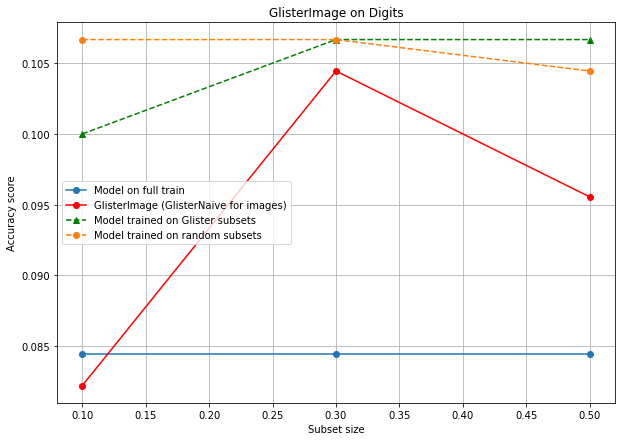

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.plot([0.1, 0.3, 0.5], [image_fulltrain_acc] * 3, label = 'Model on full train', marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_image_acc, label = 'GlisterImage (GlisterNaive for images)', linestyle = "-", color = 'r', marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_image_subset_acc, label = 'Model trained on Glister subsets', linestyle = "--", color = "green", marker = "^")
ax.plot([0.1, 0.3, 0.5], image_random_subsets_acc, label = 'Model trained on random subsets', linestyle = "--", marker = "o")
plt.grid()
plt.title('GlisterImage on Digits')
plt.xlabel("Subset size")
plt.ylabel("Accuracy score")
plt.legend();

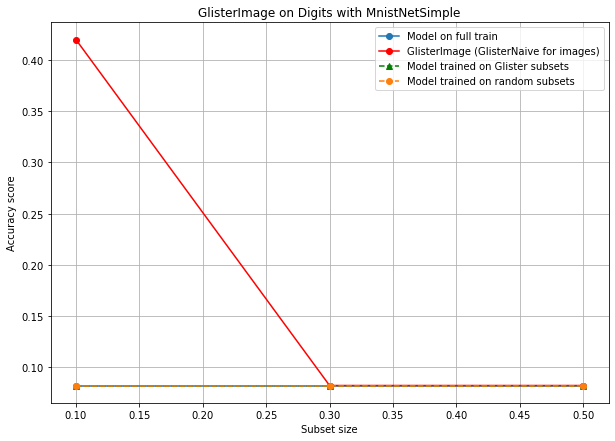

In [60]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.plot([0.1, 0.3, 0.5], [simple_image_fulltrain_acc] * 3, label = 'Model on full train', marker = "o")
ax.plot([0.1, 0.3, 0.5], simple_glister_image_acc, label = 'GlisterImage (GlisterNaive for images)', linestyle = "-", color = 'r', marker = "o")
ax.plot([0.1, 0.3, 0.5], simple_glister_image_subset_acc, label = 'Model trained on Glister subsets', linestyle = "--", color = "green", marker = "^")
ax.plot([0.1, 0.3, 0.5], simple_image_random_subsets_acc, label = 'Model trained on random subsets', linestyle = "--", marker = "o")
plt.grid()
plt.title('GlisterImage on Digits with MnistNetSimple')
plt.xlabel("Subset size")
plt.ylabel("Accuracy score")
plt.legend();

In [13]:
from GlisterRegular.GlisterNaive import GlisterNaive
from GlisterRegular.GlisterStochastic import GlisterStochasticReg, GlisterStochasticNoReg

In [16]:
torch.manual_seed(42)
np.random.seed(42)

### Data

In [10]:
fullset = DNA_DATA(np.array(digits_train), np.array(targets_train))
valset = DNA_DATA(np.array(digits_train), np.array(targets_train))
testset = DNA_DATA(np.array(digits_test), np.array(targets_test))

### Model

In [22]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(64, 512)
        self.linear2 = torch.nn.Linear(512, 10)
    
    def forward(self, x, last=False):
        l1scores = torch.nn.functional.relu(self.linear1(x))
        scores = self.linear2(l1scores)
        if last:
            return scores, l1scores
        else:
            return scores

### GlisterNaive

In [23]:
glister_naive_acc = []
glister_naive_indexes = []

for k in [100, 300, 500]:
    glister_naive = GlisterNaive(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 10,
    n_channels = 1,
    bud = k,
    lam = 0.1)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister_naive.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_naive_acc.append(tst_acc)
    glister_naive_indexes.append(idxs)

Epoch: 1 SubsetTrn,FullTrn,ValLoss: 2.3046939373016357 140.41710567474365 6.909812688827515
selEpoch: 0, Starting Selection: 2021-03-20 18:35:22.314761
numSelected: 0 Time for 1: 0.00435185432434082
selEpoch: 0, Selection Ended at: 2021-03-20 18:35:22.385897
Epoch: 2 SubsetTrn,FullTrn,ValLoss: 11.515202522277832 140.41137981414795 6.909607887268066
selEpoch: 1, Starting Selection: 2021-03-20 18:35:22.411307
numSelected: 0 Time for 1: 0.004258155822753906
selEpoch: 1, Selection Ended at: 2021-03-20 18:35:22.480881
Epoch: 3 SubsetTrn,FullTrn,ValLoss: 11.50056791305542 140.3713698387146 6.9074413776397705
selEpoch: 2, Starting Selection: 2021-03-20 18:35:22.505971


/Users/vladimiromelyusik/glister_online/final_experiments/GlisterRegular/set_function.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_wise_indices = np.array([list(BatchSampler(SequentialSampler(np.arange(self.N_trn)), self.batch_size, drop_last=False))][0])


numSelected: 0 Time for 1: 0.004830121994018555
selEpoch: 2, Selection Ended at: 2021-03-20 18:35:22.580056
Epoch: 4 SubsetTrn,FullTrn,ValLoss: 11.510965347290039 140.37886548042297 6.897969484329224
selEpoch: 3, Starting Selection: 2021-03-20 18:35:22.605890
numSelected: 0 Time for 1: 0.004476308822631836
selEpoch: 3, Selection Ended at: 2021-03-20 18:35:22.677005
Epoch: 5 SubsetTrn,FullTrn,ValLoss: 11.478099822998047 140.35682582855225 6.8974151611328125
selEpoch: 4, Starting Selection: 2021-03-20 18:35:22.703382
numSelected: 0 Time for 1: 0.00444793701171875
selEpoch: 4, Selection Ended at: 2021-03-20 18:35:22.777696
Epoch: 6 SubsetTrn,FullTrn,ValLoss: 11.483969926834106 140.36241936683655 6.89037823677063
selEpoch: 5, Starting Selection: 2021-03-20 18:35:22.803796
numSelected: 0 Time for 1: 0.004588127136230469
selEpoch: 5, Selection Ended at: 2021-03-20 18:35:22.879273
Epoch: 7 SubsetTrn,FullTrn,ValLoss: 11.421184778213501 140.41019105911255 6.880250692367554
selEpoch: 6, Starting

numSelected: 0 Time for 1: 0.004826068878173828
selEpoch: 34, Selection Ended at: 2021-03-20 18:35:25.987768
Epoch: 36 SubsetTrn,FullTrn,ValLoss: 11.464730501174927 140.1487739086151 6.803572654724121
selEpoch: 35, Starting Selection: 2021-03-20 18:35:26.013334
numSelected: 0 Time for 1: 0.004423856735229492
selEpoch: 35, Selection Ended at: 2021-03-20 18:35:26.083992
Epoch: 37 SubsetTrn,FullTrn,ValLoss: 11.497014999389648 140.0654730796814 6.806773662567139
selEpoch: 36, Starting Selection: 2021-03-20 18:35:26.109532
numSelected: 0 Time for 1: 0.004683017730712891
selEpoch: 36, Selection Ended at: 2021-03-20 18:35:26.189374
Epoch: 38 SubsetTrn,FullTrn,ValLoss: 11.395968198776245 140.10143041610718 6.81204080581665
selEpoch: 37, Starting Selection: 2021-03-20 18:35:26.221039
numSelected: 0 Time for 1: 0.005561113357543945
selEpoch: 37, Selection Ended at: 2021-03-20 18:35:26.308466
Epoch: 39 SubsetTrn,FullTrn,ValLoss: 11.386673927307129 140.1437349319458 6.801177740097046
selEpoch: 38,

Epoch: 69 SubsetTrn,FullTrn,ValLoss: 11.417428970336914 139.71452164649963 6.778884649276733
selEpoch: 68, Starting Selection: 2021-03-20 18:35:29.387679
numSelected: 0 Time for 1: 0.00452876091003418
selEpoch: 68, Selection Ended at: 2021-03-20 18:35:29.458515
Epoch: 70 SubsetTrn,FullTrn,ValLoss: 11.305273532867432 139.78346943855286 6.773600101470947
selEpoch: 69, Starting Selection: 2021-03-20 18:35:29.483706
numSelected: 0 Time for 1: 0.0044019222259521484
selEpoch: 69, Selection Ended at: 2021-03-20 18:35:29.552971
Epoch: 71 SubsetTrn,FullTrn,ValLoss: 11.332613468170166 139.82978343963623 6.774008512496948
selEpoch: 70, Starting Selection: 2021-03-20 18:35:29.578020
numSelected: 0 Time for 1: 0.004936933517456055
selEpoch: 70, Selection Ended at: 2021-03-20 18:35:29.650307
Epoch: 72 SubsetTrn,FullTrn,ValLoss: 11.321227550506592 139.83541631698608 6.761519193649292
selEpoch: 71, Starting Selection: 2021-03-20 18:35:29.675326
numSelected: 0 Time for 1: 0.00435185432434082
selEpoch: 

Epoch: 101 SubsetTrn,FullTrn,ValLoss: 11.407083511352539 139.00398993492126 6.766618967056274
selEpoch: 100, Starting Selection: 2021-03-20 18:35:32.694371
numSelected: 0 Time for 1: 0.0054280757904052734
selEpoch: 100, Selection Ended at: 2021-03-20 18:35:32.772671
Epoch: 102 SubsetTrn,FullTrn,ValLoss: 11.37317156791687 138.93514776229858 6.757658958435059
selEpoch: 101, Starting Selection: 2021-03-20 18:35:32.798092
numSelected: 0 Time for 1: 0.004346132278442383
selEpoch: 101, Selection Ended at: 2021-03-20 18:35:32.868002
Epoch: 103 SubsetTrn,FullTrn,ValLoss: 11.259358167648315 138.97426199913025 6.755158424377441
selEpoch: 102, Starting Selection: 2021-03-20 18:35:32.892794
numSelected: 0 Time for 1: 0.0049626827239990234
selEpoch: 102, Selection Ended at: 2021-03-20 18:35:32.974294
Epoch: 104 SubsetTrn,FullTrn,ValLoss: 11.266831398010254 138.98513650894165 6.757810831069946
selEpoch: 103, Starting Selection: 2021-03-20 18:35:33.005533
numSelected: 0 Time for 1: 0.0054609775543212

Epoch: 132 SubsetTrn,FullTrn,ValLoss: 11.344604969024658 138.22654581069946 6.716749429702759
selEpoch: 131, Starting Selection: 2021-03-20 18:35:35.856097
numSelected: 0 Time for 1: 0.004422903060913086
selEpoch: 131, Selection Ended at: 2021-03-20 18:35:35.926522
Epoch: 133 SubsetTrn,FullTrn,ValLoss: 11.181759119033813 138.30461287498474 6.709049940109253
selEpoch: 132, Starting Selection: 2021-03-20 18:35:35.951415
numSelected: 0 Time for 1: 0.004250049591064453
selEpoch: 132, Selection Ended at: 2021-03-20 18:35:36.022033
Epoch: 134 SubsetTrn,FullTrn,ValLoss: 11.271949768066406 138.3076364994049 6.704919338226318
selEpoch: 133, Starting Selection: 2021-03-20 18:35:36.048570
numSelected: 0 Time for 1: 0.0046389102935791016
selEpoch: 133, Selection Ended at: 2021-03-20 18:35:36.124241
Epoch: 135 SubsetTrn,FullTrn,ValLoss: 11.189628601074219 138.35015034675598 6.69965386390686
selEpoch: 134, Starting Selection: 2021-03-20 18:35:36.151446
numSelected: 0 Time for 1: 0.00517582893371582


Epoch: 164 SubsetTrn,FullTrn,ValLoss: 11.227179765701294 137.5627453327179 6.665497303009033
selEpoch: 163, Starting Selection: 2021-03-20 18:35:39.003867
numSelected: 0 Time for 1: 0.004534006118774414
selEpoch: 163, Selection Ended at: 2021-03-20 18:35:39.074737
Epoch: 165 SubsetTrn,FullTrn,ValLoss: 11.245114088058472 137.48194694519043 6.6743645668029785
selEpoch: 164, Starting Selection: 2021-03-20 18:35:39.099451
numSelected: 0 Time for 1: 0.004363059997558594
selEpoch: 164, Selection Ended at: 2021-03-20 18:35:39.168492
Epoch: 166 SubsetTrn,FullTrn,ValLoss: 11.21510934829712 137.41758251190186 6.67007303237915
selEpoch: 165, Starting Selection: 2021-03-20 18:35:39.193084
numSelected: 0 Time for 1: 0.004576206207275391
selEpoch: 165, Selection Ended at: 2021-03-20 18:35:39.264651
Epoch: 167 SubsetTrn,FullTrn,ValLoss: 11.133267641067505 137.3856794834137 6.66110897064209
selEpoch: 166, Starting Selection: 2021-03-20 18:35:39.290131
numSelected: 0 Time for 1: 0.004551887512207031
se

selEpoch: 195, Selection Ended at: 2021-03-20 18:35:42.155062
Epoch: 197 SubsetTrn,FullTrn,ValLoss: 11.131864547729492 136.4028832912445 6.634931802749634
selEpoch: 196, Starting Selection: 2021-03-20 18:35:42.181843
numSelected: 0 Time for 1: 0.004624843597412109
selEpoch: 196, Selection Ended at: 2021-03-20 18:35:42.254240
Epoch: 198 SubsetTrn,FullTrn,ValLoss: 11.02979326248169 136.48007798194885 6.61970853805542
selEpoch: 197, Starting Selection: 2021-03-20 18:35:42.280048
numSelected: 0 Time for 1: 0.004563331604003906
selEpoch: 197, Selection Ended at: 2021-03-20 18:35:42.352023
Epoch: 199 SubsetTrn,FullTrn,ValLoss: 11.080768346786499 136.4500114917755 6.616612195968628
selEpoch: 198, Starting Selection: 2021-03-20 18:35:42.377913
numSelected: 0 Time for 1: 0.004467964172363281
selEpoch: 198, Selection Ended at: 2021-03-20 18:35:42.450599
Epoch: 200 SubsetTrn,FullTrn,ValLoss: 11.199329853057861 136.335191488266 6.606687068939209
selEpoch: 199, Starting Selection: 2021-03-20 18:35:

selEpoch: 27, Selection Ended at: 2021-03-20 18:35:45.993149
Epoch: 29 SubsetTrn,FullTrn,ValLoss: 34.17508792877197 139.00046300888062 6.78694486618042
selEpoch: 28, Starting Selection: 2021-03-20 18:35:46.026772
numSelected: 0 Time for 1: 0.0021517276763916016
selEpoch: 28, Selection Ended at: 2021-03-20 18:35:46.114360
Epoch: 30 SubsetTrn,FullTrn,ValLoss: 34.16475224494934 138.91884183883667 6.773566961288452
selEpoch: 29, Starting Selection: 2021-03-20 18:35:46.146435
numSelected: 0 Time for 1: 0.001958131790161133
selEpoch: 29, Selection Ended at: 2021-03-20 18:35:46.233551
Epoch: 31 SubsetTrn,FullTrn,ValLoss: 34.085147857666016 138.86582779884338 6.779977083206177
selEpoch: 30, Starting Selection: 2021-03-20 18:35:46.266306
numSelected: 0 Time for 1: 0.0020978450775146484
selEpoch: 30, Selection Ended at: 2021-03-20 18:35:46.352983
Epoch: 32 SubsetTrn,FullTrn,ValLoss: 34.07833218574524 138.82143664360046 6.767130374908447
selEpoch: 31, Starting Selection: 2021-03-20 18:35:46.38509

selEpoch: 59, Selection Ended at: 2021-03-20 18:35:49.817881
Epoch: 61 SubsetTrn,FullTrn,ValLoss: 33.525991678237915 136.46086144447327 6.695465803146362
selEpoch: 60, Starting Selection: 2021-03-20 18:35:49.850603
numSelected: 0 Time for 1: 0.002090930938720703
selEpoch: 60, Selection Ended at: 2021-03-20 18:35:49.937124
Epoch: 62 SubsetTrn,FullTrn,ValLoss: 33.453354835510254 136.44207859039307 6.677678108215332
selEpoch: 61, Starting Selection: 2021-03-20 18:35:49.969343
numSelected: 0 Time for 1: 0.002048015594482422
selEpoch: 61, Selection Ended at: 2021-03-20 18:35:50.056876
Epoch: 63 SubsetTrn,FullTrn,ValLoss: 33.55299520492554 136.3175106048584 6.672845840454102
selEpoch: 62, Starting Selection: 2021-03-20 18:35:50.089294
numSelected: 0 Time for 1: 0.001979351043701172
selEpoch: 62, Selection Ended at: 2021-03-20 18:35:50.175349
Epoch: 64 SubsetTrn,FullTrn,ValLoss: 33.45027184486389 136.2225570678711 6.673882007598877
selEpoch: 63, Starting Selection: 2021-03-20 18:35:50.208050


selEpoch: 91, Selection Ended at: 2021-03-20 18:35:53.646032
Epoch: 93 SubsetTrn,FullTrn,ValLoss: 32.5911078453064 132.79651427268982 6.4789581298828125
selEpoch: 92, Starting Selection: 2021-03-20 18:35:53.678819
numSelected: 0 Time for 1: 0.001981973648071289
selEpoch: 92, Selection Ended at: 2021-03-20 18:35:53.765654
Epoch: 94 SubsetTrn,FullTrn,ValLoss: 32.63162803649902 132.5817551612854 6.485596418380737
selEpoch: 93, Starting Selection: 2021-03-20 18:35:53.797687
numSelected: 0 Time for 1: 0.002061128616333008
selEpoch: 93, Selection Ended at: 2021-03-20 18:35:53.885205
Epoch: 95 SubsetTrn,FullTrn,ValLoss: 32.58222937583923 132.49182295799255 6.463440895080566
selEpoch: 94, Starting Selection: 2021-03-20 18:35:53.917453
numSelected: 0 Time for 1: 0.001989126205444336
selEpoch: 94, Selection Ended at: 2021-03-20 18:35:54.004104
Epoch: 96 SubsetTrn,FullTrn,ValLoss: 32.472663164138794 132.281991481781 6.459228992462158
selEpoch: 95, Starting Selection: 2021-03-20 18:35:54.036695
nu

selEpoch: 123, Selection Ended at: 2021-03-20 18:35:57.470991
Epoch: 125 SubsetTrn,FullTrn,ValLoss: 30.98315155506134 126.94432604312897 6.197434186935425
selEpoch: 124, Starting Selection: 2021-03-20 18:35:57.503836
numSelected: 0 Time for 1: 0.0020720958709716797
selEpoch: 124, Selection Ended at: 2021-03-20 18:35:57.590389
Epoch: 126 SubsetTrn,FullTrn,ValLoss: 31.089419841766357 126.64041244983673 6.207343816757202
selEpoch: 125, Starting Selection: 2021-03-20 18:35:57.622733
numSelected: 0 Time for 1: 0.002092123031616211
selEpoch: 125, Selection Ended at: 2021-03-20 18:35:57.709850
Epoch: 127 SubsetTrn,FullTrn,ValLoss: 31.111189603805542 126.3727798461914 6.19749116897583
selEpoch: 126, Starting Selection: 2021-03-20 18:35:57.742300
numSelected: 0 Time for 1: 0.0019769668579101562
selEpoch: 126, Selection Ended at: 2021-03-20 18:35:57.828378
Epoch: 128 SubsetTrn,FullTrn,ValLoss: 30.93459129333496 126.20830309391022 6.171158790588379
selEpoch: 127, Starting Selection: 2021-03-20 18

selEpoch: 155, Selection Ended at: 2021-03-20 18:36:01.294649
Epoch: 157 SubsetTrn,FullTrn,ValLoss: 29.159855246543884 118.00769853591919 5.739033937454224
selEpoch: 156, Starting Selection: 2021-03-20 18:36:01.327850
numSelected: 0 Time for 1: 0.002056121826171875
selEpoch: 156, Selection Ended at: 2021-03-20 18:36:01.416737
Epoch: 158 SubsetTrn,FullTrn,ValLoss: 29.235352516174316 117.63778603076935 5.721854329109192
selEpoch: 157, Starting Selection: 2021-03-20 18:36:01.449762
numSelected: 0 Time for 1: 0.002007722854614258
selEpoch: 157, Selection Ended at: 2021-03-20 18:36:01.537226
Epoch: 159 SubsetTrn,FullTrn,ValLoss: 28.97750687599182 117.38437378406525 5.723074436187744
selEpoch: 158, Starting Selection: 2021-03-20 18:36:01.570362
numSelected: 0 Time for 1: 0.0020372867584228516
selEpoch: 158, Selection Ended at: 2021-03-20 18:36:01.657252
Epoch: 160 SubsetTrn,FullTrn,ValLoss: 28.700095772743225 116.9891768693924 5.73084557056427
selEpoch: 159, Starting Selection: 2021-03-20 18

selEpoch: 187, Selection Ended at: 2021-03-20 18:36:05.118756
Epoch: 189 SubsetTrn,FullTrn,ValLoss: 26.5762277841568 105.99241983890533 5.1578205823898315
selEpoch: 188, Starting Selection: 2021-03-20 18:36:05.151528
numSelected: 0 Time for 1: 0.0019989013671875
selEpoch: 188, Selection Ended at: 2021-03-20 18:36:05.238353
Epoch: 190 SubsetTrn,FullTrn,ValLoss: 26.350534558296204 105.55956482887268 5.137577652931213
selEpoch: 189, Starting Selection: 2021-03-20 18:36:05.270399
numSelected: 0 Time for 1: 0.0020177364349365234
selEpoch: 189, Selection Ended at: 2021-03-20 18:36:05.357515
Epoch: 191 SubsetTrn,FullTrn,ValLoss: 26.158896327018738 105.36164557933807 5.10600733757019
selEpoch: 190, Starting Selection: 2021-03-20 18:36:05.390367
numSelected: 0 Time for 1: 0.002001047134399414
selEpoch: 190, Selection Ended at: 2021-03-20 18:36:05.476711
Epoch: 192 SubsetTrn,FullTrn,ValLoss: 26.04917871952057 104.76135098934174 5.06921112537384
selEpoch: 191, Starting Selection: 2021-03-20 18:36

numSelected: 0 Time for 1: 0.0016231536865234375
selEpoch: 19, Selection Ended at: 2021-03-20 18:36:09.497385
Epoch: 21 SubsetTrn,FullTrn,ValLoss: 56.7212336063385 138.5282633304596 6.785452842712402
selEpoch: 20, Starting Selection: 2021-03-20 18:36:09.538207
numSelected: 0 Time for 1: 0.001505136489868164
selEpoch: 20, Selection Ended at: 2021-03-20 18:36:09.641702
Epoch: 22 SubsetTrn,FullTrn,ValLoss: 56.68029451370239 138.41235995292664 6.778943777084351
selEpoch: 21, Starting Selection: 2021-03-20 18:36:09.682835
numSelected: 0 Time for 1: 0.0015990734100341797
selEpoch: 21, Selection Ended at: 2021-03-20 18:36:09.786060
Epoch: 23 SubsetTrn,FullTrn,ValLoss: 56.739036321640015 138.26860356330872 6.77128791809082
selEpoch: 22, Starting Selection: 2021-03-20 18:36:09.826304
numSelected: 0 Time for 1: 0.0016210079193115234
selEpoch: 22, Selection Ended at: 2021-03-20 18:36:09.930712
Epoch: 24 SubsetTrn,FullTrn,ValLoss: 56.61514091491699 138.09883785247803 6.783843278884888
selEpoch: 23

selEpoch: 50, Selection Ended at: 2021-03-20 18:36:13.980655
Epoch: 52 SubsetTrn,FullTrn,ValLoss: 54.77162480354309 133.5315239429474 6.547042608261108
selEpoch: 51, Starting Selection: 2021-03-20 18:36:14.021395
numSelected: 0 Time for 1: 0.0016350746154785156
selEpoch: 51, Selection Ended at: 2021-03-20 18:36:14.125319
Epoch: 53 SubsetTrn,FullTrn,ValLoss: 54.779075145721436 133.2504518032074 6.5223777294158936
selEpoch: 52, Starting Selection: 2021-03-20 18:36:14.165589
numSelected: 0 Time for 1: 0.0016162395477294922
selEpoch: 52, Selection Ended at: 2021-03-20 18:36:14.270098
Epoch: 54 SubsetTrn,FullTrn,ValLoss: 54.51160216331482 133.03133010864258 6.515022277832031
selEpoch: 53, Starting Selection: 2021-03-20 18:36:14.310514
numSelected: 0 Time for 1: 0.0015430450439453125
selEpoch: 53, Selection Ended at: 2021-03-20 18:36:14.413074
Epoch: 55 SubsetTrn,FullTrn,ValLoss: 54.41958022117615 132.8218092918396 6.5097410678863525
selEpoch: 54, Starting Selection: 2021-03-20 18:36:14.4541

numSelected: 0 Time for 1: 0.0016682147979736328
selEpoch: 82, Selection Ended at: 2021-03-20 18:36:18.651875
Epoch: 84 SubsetTrn,FullTrn,ValLoss: 50.28474962711334 122.57931995391846 5.97883927822113
selEpoch: 83, Starting Selection: 2021-03-20 18:36:18.692724
numSelected: 0 Time for 1: 0.0016849040985107422
selEpoch: 83, Selection Ended at: 2021-03-20 18:36:18.796942
Epoch: 85 SubsetTrn,FullTrn,ValLoss: 50.20297861099243 122.15595698356628 5.985432386398315
selEpoch: 84, Starting Selection: 2021-03-20 18:36:18.838280
numSelected: 0 Time for 1: 0.0016629695892333984
selEpoch: 84, Selection Ended at: 2021-03-20 18:36:18.942678
Epoch: 86 SubsetTrn,FullTrn,ValLoss: 49.98066830635071 121.69368481636047 5.927397012710571
selEpoch: 85, Starting Selection: 2021-03-20 18:36:18.983376
numSelected: 0 Time for 1: 0.001634836196899414
selEpoch: 85, Selection Ended at: 2021-03-20 18:36:19.088103
Epoch: 87 SubsetTrn,FullTrn,ValLoss: 49.88734757900238 121.12420070171356 5.936033606529236
selEpoch: 8

selEpoch: 113, Selection Ended at: 2021-03-20 18:36:23.143628
Epoch: 115 SubsetTrn,FullTrn,ValLoss: 43.01733672618866 104.32116866111755 5.065845966339111
selEpoch: 114, Starting Selection: 2021-03-20 18:36:23.184457
numSelected: 0 Time for 1: 0.0015926361083984375
selEpoch: 114, Selection Ended at: 2021-03-20 18:36:23.290571
Epoch: 116 SubsetTrn,FullTrn,ValLoss: 42.53257465362549 103.60248506069183 5.025876522064209
selEpoch: 115, Starting Selection: 2021-03-20 18:36:23.331223
numSelected: 0 Time for 1: 0.0017049312591552734
selEpoch: 115, Selection Ended at: 2021-03-20 18:36:23.438396
Epoch: 117 SubsetTrn,FullTrn,ValLoss: 42.51213073730469 102.98488330841064 4.990236401557922
selEpoch: 116, Starting Selection: 2021-03-20 18:36:23.479255
numSelected: 0 Time for 1: 0.0016319751739501953
selEpoch: 116, Selection Ended at: 2021-03-20 18:36:23.583471
Epoch: 118 SubsetTrn,FullTrn,ValLoss: 42.69278144836426 102.23078835010529 5.01127302646637
selEpoch: 117, Starting Selection: 2021-03-20 18

numSelected: 0 Time for 1: 0.0015292167663574219
selEpoch: 145, Selection Ended at: 2021-03-20 18:36:27.784039
Epoch: 147 SubsetTrn,FullTrn,ValLoss: 34.26480436325073 81.95084226131439 3.963373303413391
selEpoch: 146, Starting Selection: 2021-03-20 18:36:27.825023
numSelected: 0 Time for 1: 0.0016369819641113281
selEpoch: 146, Selection Ended at: 2021-03-20 18:36:27.929000
Epoch: 148 SubsetTrn,FullTrn,ValLoss: 33.74728345870972 81.22396194934845 3.8967946767807007
selEpoch: 147, Starting Selection: 2021-03-20 18:36:27.970419
numSelected: 0 Time for 1: 0.0016639232635498047
selEpoch: 147, Selection Ended at: 2021-03-20 18:36:28.073985
Epoch: 149 SubsetTrn,FullTrn,ValLoss: 33.494996070861816 80.6710274219513 3.8513846397399902
selEpoch: 148, Starting Selection: 2021-03-20 18:36:28.114548
numSelected: 0 Time for 1: 0.0015981197357177734
selEpoch: 148, Selection Ended at: 2021-03-20 18:36:28.218960
Epoch: 150 SubsetTrn,FullTrn,ValLoss: 33.22792994976044 80.0530915260315 3.881662130355835
s

selEpoch: 176, Selection Ended at: 2021-03-20 18:36:32.317646
Epoch: 178 SubsetTrn,FullTrn,ValLoss: 26.988909900188446 63.65275263786316 3.0891597270965576
selEpoch: 177, Starting Selection: 2021-03-20 18:36:32.359282
numSelected: 0 Time for 1: 0.0015718936920166016
selEpoch: 177, Selection Ended at: 2021-03-20 18:36:32.463805
Epoch: 179 SubsetTrn,FullTrn,ValLoss: 26.814118683338165 63.00406938791275 3.0558237433433533
selEpoch: 178, Starting Selection: 2021-03-20 18:36:32.504711
numSelected: 0 Time for 1: 0.0016391277313232422
selEpoch: 178, Selection Ended at: 2021-03-20 18:36:32.609118
Epoch: 180 SubsetTrn,FullTrn,ValLoss: 26.52190673351288 62.46331298351288 3.038747251033783
selEpoch: 179, Starting Selection: 2021-03-20 18:36:32.649535
numSelected: 0 Time for 1: 0.0015878677368164062
selEpoch: 179, Selection Ended at: 2021-03-20 18:36:32.752160
Epoch: 181 SubsetTrn,FullTrn,ValLoss: 25.80999255180359 62.31133586168289 2.96000474691391
selEpoch: 180, Starting Selection: 2021-03-20 18

### GlisterStochasticReg

In [24]:
glister_stoch_reg_acc = []
glister_stoch_reg_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister = GlisterStochasticReg(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 10,
    n_channels = 1,
    bud = int(k * len(fullset)),
    lam = 0.1)
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_stoch_reg_acc.append(tst_acc)
    glister_stoch_reg_indexes.append(idxs)

numSelected: 0 Time for 1: 0.0036363601684570312
numSelected: 0 Time for 1: 0.003803730010986328
numSelected: 0 Time for 1: 0.0035212039947509766
numSelected: 0 Time for 1: 0.003756999969482422
numSelected: 0 Time for 1: 0.0036368370056152344
numSelected: 0 Time for 1: 0.003480672836303711
numSelected: 0 Time for 1: 0.003620147705078125
numSelected: 0 Time for 1: 0.0036818981170654297
numSelected: 0 Time for 1: 0.003549814224243164
numSelected: 0 Time for 1: 0.0035881996154785156
numSelected: 0 Time for 1: 0.0037620067596435547
numSelected: 0 Time for 1: 0.0037240982055664062
numSelected: 0 Time for 1: 0.0036089420318603516
numSelected: 0 Time for 1: 0.0035228729248046875
numSelected: 0 Time for 1: 0.003467082977294922
numSelected: 0 Time for 1: 0.003779172897338867
numSelected: 0 Time for 1: 0.003604888916015625
numSelected: 0 Time for 1: 0.0035490989685058594
numSelected: 0 Time for 1: 0.0036787986755371094
numSelected: 0 Time for 1: 0.0037009716033935547
numSelected: 0 Time for 1: 0

numSelected: 0 Time for 1: 0.0036258697509765625
numSelected: 0 Time for 1: 0.0035626888275146484
numSelected: 0 Time for 1: 0.003576040267944336
numSelected: 0 Time for 1: 0.003567934036254883
numSelected: 0 Time for 1: 0.003618955612182617
numSelected: 0 Time for 1: 0.0035507678985595703
numSelected: 0 Time for 1: 0.0034012794494628906
numSelected: 0 Time for 1: 0.0035970211029052734
numSelected: 0 Time for 1: 0.003509998321533203
numSelected: 0 Time for 1: 0.0034780502319335938
numSelected: 0 Time for 1: 0.003631114959716797
numSelected: 0 Time for 1: 0.0035126209259033203
numSelected: 0 Time for 1: 0.003573179244995117
numSelected: 0 Time for 1: 0.003442049026489258
numSelected: 0 Time for 1: 0.0034580230712890625
numSelected: 0 Time for 1: 0.0035550594329833984
numSelected: 0 Time for 1: 0.0035021305084228516
numSelected: 0 Time for 1: 0.0034818649291992188
numSelected: 0 Time for 1: 0.0036890506744384766
numSelected: 0 Time for 1: 0.0036890506744384766
numSelected: 0 Time for 1: 

numSelected: 0 Time for 1: 0.0020380020141601562
numSelected: 0 Time for 1: 0.0018601417541503906
numSelected: 0 Time for 1: 0.0018470287322998047
numSelected: 0 Time for 1: 0.00202178955078125
numSelected: 0 Time for 1: 0.0018138885498046875
numSelected: 0 Time for 1: 0.0016820430755615234
numSelected: 0 Time for 1: 0.0018489360809326172
numSelected: 0 Time for 1: 0.0016829967498779297
numSelected: 0 Time for 1: 0.0018172264099121094
numSelected: 0 Time for 1: 0.0018601417541503906
numSelected: 0 Time for 1: 0.0018839836120605469
numSelected: 0 Time for 1: 0.0017626285552978516
numSelected: 0 Time for 1: 0.0019736289978027344
numSelected: 0 Time for 1: 0.001995086669921875
numSelected: 0 Time for 1: 0.0022649765014648438
numSelected: 0 Time for 1: 0.0019419193267822266
numSelected: 0 Time for 1: 0.002104043960571289
numSelected: 0 Time for 1: 0.002543926239013672
numSelected: 0 Time for 1: 0.0021848678588867188
numSelected: 0 Time for 1: 0.002276182174682617
numSelected: 0 Time for 1:

numSelected: 0 Time for 1: 0.0014600753784179688
numSelected: 0 Time for 1: 0.0013709068298339844
numSelected: 0 Time for 1: 0.0014536380767822266
numSelected: 0 Time for 1: 0.0014579296112060547
numSelected: 0 Time for 1: 0.001341104507446289
numSelected: 0 Time for 1: 0.0014469623565673828
numSelected: 0 Time for 1: 0.001331329345703125
numSelected: 0 Time for 1: 0.0013322830200195312
numSelected: 0 Time for 1: 0.0014259815216064453
numSelected: 0 Time for 1: 0.0015599727630615234
numSelected: 0 Time for 1: 0.0014729499816894531
numSelected: 0 Time for 1: 0.0015311241149902344
numSelected: 0 Time for 1: 0.001516103744506836
numSelected: 0 Time for 1: 0.001461029052734375
numSelected: 0 Time for 1: 0.0014138221740722656
numSelected: 0 Time for 1: 0.001363992691040039
numSelected: 0 Time for 1: 0.0014541149139404297
numSelected: 0 Time for 1: 0.0014758110046386719
numSelected: 0 Time for 1: 0.0014510154724121094
numSelected: 0 Time for 1: 0.0013391971588134766
numSelected: 0 Time for 1

In [25]:
glister_stoch_no_reg_acc = []
glister_stoch_no_reg_indexes = []

for k in [0.1, 0.3, 0.5]:
    glister = GlisterStochasticNoReg(
    fullset = fullset,
    valset = valset,
    testset = testset,
    device = "cpu",
    validation_set_fraction = 0.1,
    trn_batch_size = 20,
    val_batch_size = 50,
    tst_batch_size = 50,
    dss_batch_size = 50,
    model = TwoLayerNet(),
    num_epochs = 200,
    learning_rate = 0.05,
    num_classes = 10,
    n_channels = 1,
    bud = int(k * len(fullset)))
    
    val_acc, tst_acc, subtrn_acc, full_trn_acc,\
    val_loss, test_loss, subtrn_loss, full_trn_loss,\
    val_losses, substrn_losses, fulltrn_losses,\
    idxs, time = glister.random_greedy_train_model_online_taylor(np.arange(20))
    
    glister_stoch_no_reg_acc.append(tst_acc)
    glister_stoch_no_reg_indexes.append(idxs)

numSelected: 0 Time for 1: 0.0012149810791015625
numSelected: 100 Time for 1: 0.0010631084442138672
numSelected: 0 Time for 1: 0.0012111663818359375
numSelected: 100 Time for 1: 0.0011439323425292969
numSelected: 0 Time for 1: 0.0011410713195800781
numSelected: 100 Time for 1: 0.0010848045349121094
numSelected: 0 Time for 1: 0.0011398792266845703
numSelected: 100 Time for 1: 0.0011336803436279297
numSelected: 0 Time for 1: 0.0012018680572509766
numSelected: 100 Time for 1: 0.0010890960693359375
numSelected: 0 Time for 1: 0.0011739730834960938
numSelected: 100 Time for 1: 0.001056671142578125
numSelected: 0 Time for 1: 0.001299142837524414
numSelected: 100 Time for 1: 0.0010552406311035156
numSelected: 0 Time for 1: 0.0012123584747314453
numSelected: 100 Time for 1: 0.0010988712310791016
numSelected: 0 Time for 1: 0.0011699199676513672
numSelected: 100 Time for 1: 0.0011529922485351562
numSelected: 0 Time for 1: 0.0012390613555908203
numSelected: 100 Time for 1: 0.0011739730834960938
nu

numSelected: 0 Time for 1: 0.0011761188507080078
numSelected: 100 Time for 1: 0.0011830329895019531
numSelected: 0 Time for 1: 0.0011780261993408203
numSelected: 100 Time for 1: 0.0010597705841064453
numSelected: 0 Time for 1: 0.0011661052703857422
numSelected: 100 Time for 1: 0.0010728836059570312
numSelected: 0 Time for 1: 0.0011229515075683594
numSelected: 100 Time for 1: 0.0011680126190185547
numSelected: 0 Time for 1: 0.0011451244354248047
numSelected: 100 Time for 1: 0.001094818115234375
numSelected: 0 Time for 1: 0.0011799335479736328
numSelected: 100 Time for 1: 0.0011241436004638672
numSelected: 0 Time for 1: 0.0010721683502197266
numSelected: 100 Time for 1: 0.0011048316955566406
numSelected: 0 Time for 1: 0.0014600753784179688
numSelected: 100 Time for 1: 0.0011370182037353516
numSelected: 0 Time for 1: 0.0011630058288574219
numSelected: 100 Time for 1: 0.0011610984802246094
numSelected: 0 Time for 1: 0.0012068748474121094
numSelected: 100 Time for 1: 0.0010688304901123047
n

numSelected: 0 Time for 1: 0.0012481212615966797
numSelected: 100 Time for 1: 0.0011341571807861328
numSelected: 0 Time for 1: 0.0013129711151123047
numSelected: 100 Time for 1: 0.001230001449584961
numSelected: 0 Time for 1: 0.0013232231140136719
numSelected: 100 Time for 1: 0.0011448860168457031
numSelected: 0 Time for 1: 0.0012078285217285156
numSelected: 100 Time for 1: 0.0010848045349121094
numSelected: 0 Time for 1: 0.0012617111206054688
numSelected: 100 Time for 1: 0.00113677978515625
numSelected: 0 Time for 1: 0.0011670589447021484
numSelected: 100 Time for 1: 0.0010840892791748047
numSelected: 0 Time for 1: 0.0012438297271728516
numSelected: 100 Time for 1: 0.0011038780212402344
numSelected: 0 Time for 1: 0.0012416839599609375
numSelected: 100 Time for 1: 0.0011639595031738281
numSelected: 0 Time for 1: 0.0012400150299072266
numSelected: 100 Time for 1: 0.0014679431915283203
numSelected: 0 Time for 1: 0.0012030601501464844
numSelected: 100 Time for 1: 0.0012240409851074219
num

numSelected: 200 Time for 1: 0.0009720325469970703
numSelected: 300 Time for 1: 0.0009222030639648438
numSelected: 400 Time for 1: 0.0008962154388427734
numSelected: 0 Time for 1: 0.001085042953491211
numSelected: 100 Time for 1: 0.0009260177612304688
numSelected: 200 Time for 1: 0.0009758472442626953
numSelected: 300 Time for 1: 0.0009641647338867188
numSelected: 400 Time for 1: 0.0008547306060791016
numSelected: 0 Time for 1: 0.001032114028930664
numSelected: 100 Time for 1: 0.0008611679077148438
numSelected: 200 Time for 1: 0.0009500980377197266
numSelected: 300 Time for 1: 0.0008902549743652344
numSelected: 400 Time for 1: 0.0008568763732910156
numSelected: 0 Time for 1: 0.0010411739349365234
numSelected: 100 Time for 1: 0.001081228256225586
numSelected: 200 Time for 1: 0.0008952617645263672
numSelected: 300 Time for 1: 0.0008871555328369141
numSelected: 400 Time for 1: 0.0010650157928466797
numSelected: 0 Time for 1: 0.0010929107666015625
numSelected: 100 Time for 1: 0.00097894668

numSelected: 0 Time for 1: 0.0009319782257080078
numSelected: 100 Time for 1: 0.0009200572967529297
numSelected: 200 Time for 1: 0.0009770393371582031
numSelected: 300 Time for 1: 0.0008831024169921875
numSelected: 400 Time for 1: 0.0009770393371582031
numSelected: 0 Time for 1: 0.0010859966278076172
numSelected: 100 Time for 1: 0.0009610652923583984
numSelected: 200 Time for 1: 0.0009548664093017578
numSelected: 300 Time for 1: 0.0008952617645263672
numSelected: 400 Time for 1: 0.0009560585021972656
numSelected: 0 Time for 1: 0.001016855239868164
numSelected: 100 Time for 1: 0.0009489059448242188
numSelected: 200 Time for 1: 0.0009198188781738281
numSelected: 300 Time for 1: 0.0009169578552246094
numSelected: 400 Time for 1: 0.0008821487426757812
numSelected: 0 Time for 1: 0.0009329319000244141
numSelected: 100 Time for 1: 0.0008668899536132812
numSelected: 200 Time for 1: 0.0009829998016357422
numSelected: 300 Time for 1: 0.0009250640869140625
numSelected: 400 Time for 1: 0.000867843

numSelected: 0 Time for 1: 0.001065969467163086
numSelected: 100 Time for 1: 0.0009837150573730469
numSelected: 200 Time for 1: 0.0008921623229980469
numSelected: 300 Time for 1: 0.0009090900421142578
numSelected: 400 Time for 1: 0.0008671283721923828
numSelected: 0 Time for 1: 0.0009360313415527344
numSelected: 100 Time for 1: 0.0009169578552246094
numSelected: 200 Time for 1: 0.0009157657623291016
numSelected: 300 Time for 1: 0.0009257793426513672
numSelected: 400 Time for 1: 0.0009200572967529297
numSelected: 0 Time for 1: 0.0009350776672363281
numSelected: 100 Time for 1: 0.0008928775787353516
numSelected: 200 Time for 1: 0.0009548664093017578
numSelected: 300 Time for 1: 0.0009086132049560547
numSelected: 400 Time for 1: 0.0009367465972900391
numSelected: 0 Time for 1: 0.0009191036224365234
numSelected: 100 Time for 1: 0.0009589195251464844
numSelected: 200 Time for 1: 0.0009410381317138672
numSelected: 300 Time for 1: 0.0009479522705078125
numSelected: 400 Time for 1: 0.000877141

numSelected: 0 Time for 1: 0.0009891986846923828
numSelected: 100 Time for 1: 0.000865936279296875
numSelected: 200 Time for 1: 0.0008981227874755859
numSelected: 300 Time for 1: 0.0009450912475585938
numSelected: 400 Time for 1: 0.0008630752563476562
numSelected: 0 Time for 1: 0.0009579658508300781
numSelected: 100 Time for 1: 0.0009288787841796875
numSelected: 200 Time for 1: 0.0008759498596191406
numSelected: 300 Time for 1: 0.0008628368377685547
numSelected: 400 Time for 1: 0.0009198188781738281
numSelected: 0 Time for 1: 0.0009946823120117188
numSelected: 100 Time for 1: 0.0009670257568359375
numSelected: 200 Time for 1: 0.000904083251953125
numSelected: 300 Time for 1: 0.0009510517120361328
numSelected: 400 Time for 1: 0.0008540153503417969
numSelected: 0 Time for 1: 0.0009899139404296875
numSelected: 100 Time for 1: 0.0009043216705322266
numSelected: 200 Time for 1: 0.0009419918060302734
numSelected: 300 Time for 1: 0.0008471012115478516
numSelected: 400 Time for 1: 0.0009238719

numSelected: 0 Time for 1: 0.0009398460388183594
numSelected: 100 Time for 1: 0.0009732246398925781
numSelected: 200 Time for 1: 0.0008890628814697266
numSelected: 300 Time for 1: 0.0009348392486572266
numSelected: 400 Time for 1: 0.0008480548858642578
numSelected: 0 Time for 1: 0.0009121894836425781
numSelected: 100 Time for 1: 0.0009028911590576172
numSelected: 200 Time for 1: 0.0009529590606689453
numSelected: 300 Time for 1: 0.0008559226989746094
numSelected: 400 Time for 1: 0.0008821487426757812
numSelected: 0 Time for 1: 0.0010151863098144531
numSelected: 100 Time for 1: 0.0009391307830810547
numSelected: 200 Time for 1: 0.0008881092071533203
numSelected: 300 Time for 1: 0.000885009765625
numSelected: 400 Time for 1: 0.0009288787841796875
numSelected: 0 Time for 1: 0.0009238719940185547
numSelected: 100 Time for 1: 0.0009410381317138672
numSelected: 200 Time for 1: 0.0009448528289794922
numSelected: 300 Time for 1: 0.0008819103240966797
numSelected: 400 Time for 1: 0.000889778137

numSelected: 0 Time for 1: 0.0009670257568359375
numSelected: 100 Time for 1: 0.0008928775787353516
numSelected: 200 Time for 1: 0.0008578300476074219
numSelected: 300 Time for 1: 0.0009341239929199219
numSelected: 400 Time for 1: 0.0009298324584960938
numSelected: 0 Time for 1: 0.0009489059448242188
numSelected: 100 Time for 1: 0.0008690357208251953
numSelected: 200 Time for 1: 0.0009179115295410156
numSelected: 300 Time for 1: 0.0008990764617919922
numSelected: 400 Time for 1: 0.0008840560913085938
numSelected: 0 Time for 1: 0.0009071826934814453
numSelected: 100 Time for 1: 0.0009610652923583984
numSelected: 200 Time for 1: 0.0009081363677978516
numSelected: 300 Time for 1: 0.0008969306945800781
numSelected: 400 Time for 1: 0.0009181499481201172
numSelected: 0 Time for 1: 0.0009610652923583984
numSelected: 100 Time for 1: 0.0009071826934814453
numSelected: 200 Time for 1: 0.0008807182312011719
numSelected: 300 Time for 1: 0.0009121894836425781
numSelected: 400 Time for 1: 0.00094103

numSelected: 400 Time for 1: 0.0009081363677978516
numSelected: 500 Time for 1: 0.0008308887481689453
numSelected: 600 Time for 1: 0.000820159912109375
numSelected: 0 Time for 1: 0.0009500980377197266
numSelected: 100 Time for 1: 0.0008289813995361328
numSelected: 200 Time for 1: 0.0009038448333740234
numSelected: 300 Time for 1: 0.0009102821350097656
numSelected: 400 Time for 1: 0.0008950233459472656
numSelected: 500 Time for 1: 0.0008289813995361328
numSelected: 600 Time for 1: 0.0007927417755126953
numSelected: 0 Time for 1: 0.0009369850158691406
numSelected: 100 Time for 1: 0.0009047985076904297
numSelected: 200 Time for 1: 0.0008578300476074219
numSelected: 300 Time for 1: 0.0008788108825683594
numSelected: 400 Time for 1: 0.0015799999237060547
numSelected: 500 Time for 1: 0.0009541511535644531
numSelected: 600 Time for 1: 0.0008361339569091797
numSelected: 0 Time for 1: 0.0009059906005859375
numSelected: 100 Time for 1: 0.0009891986846923828
numSelected: 200 Time for 1: 0.0008621

numSelected: 600 Time for 1: 0.0008120536804199219
numSelected: 0 Time for 1: 0.0009758472442626953
numSelected: 100 Time for 1: 0.0009462833404541016
numSelected: 200 Time for 1: 0.0008780956268310547
numSelected: 300 Time for 1: 0.0008618831634521484
numSelected: 400 Time for 1: 0.0008831024169921875
numSelected: 500 Time for 1: 0.0008449554443359375
numSelected: 600 Time for 1: 0.0008089542388916016
numSelected: 0 Time for 1: 0.0009329319000244141
numSelected: 100 Time for 1: 0.0008478164672851562
numSelected: 200 Time for 1: 0.0008769035339355469
numSelected: 300 Time for 1: 0.0008540153503417969
numSelected: 400 Time for 1: 0.0008590221405029297
numSelected: 500 Time for 1: 0.0008320808410644531
numSelected: 600 Time for 1: 0.0008382797241210938
numSelected: 0 Time for 1: 0.0009419918060302734
numSelected: 100 Time for 1: 0.0008668899536132812
numSelected: 200 Time for 1: 0.0008602142333984375
numSelected: 300 Time for 1: 0.000843048095703125
numSelected: 400 Time for 1: 0.0009558

numSelected: 100 Time for 1: 0.0008971691131591797
numSelected: 200 Time for 1: 0.0008990764617919922
numSelected: 300 Time for 1: 0.0008440017700195312
numSelected: 400 Time for 1: 0.0008931159973144531
numSelected: 500 Time for 1: 0.0007951259613037109
numSelected: 600 Time for 1: 0.0008399486541748047
numSelected: 0 Time for 1: 0.0010120868682861328
numSelected: 100 Time for 1: 0.0009098052978515625
numSelected: 200 Time for 1: 0.0009317398071289062
numSelected: 300 Time for 1: 0.0008249282836914062
numSelected: 400 Time for 1: 0.0008339881896972656
numSelected: 500 Time for 1: 0.0008568763732910156
numSelected: 600 Time for 1: 0.0008261203765869141
numSelected: 0 Time for 1: 0.001007080078125
numSelected: 100 Time for 1: 0.0008838176727294922
numSelected: 200 Time for 1: 0.0008289813995361328
numSelected: 300 Time for 1: 0.0009200572967529297
numSelected: 400 Time for 1: 0.0008687973022460938
numSelected: 500 Time for 1: 0.0008060932159423828
numSelected: 600 Time for 1: 0.00080585

numSelected: 300 Time for 1: 0.0008690357208251953
numSelected: 400 Time for 1: 0.0008289813995361328
numSelected: 500 Time for 1: 0.0008001327514648438
numSelected: 600 Time for 1: 0.0008337497711181641
numSelected: 0 Time for 1: 0.0008959770202636719
numSelected: 100 Time for 1: 0.0009789466857910156
numSelected: 200 Time for 1: 0.0009019374847412109
numSelected: 300 Time for 1: 0.0008404254913330078
numSelected: 400 Time for 1: 0.0008738040924072266
numSelected: 500 Time for 1: 0.0007929801940917969
numSelected: 600 Time for 1: 0.0008370876312255859
numSelected: 0 Time for 1: 0.0010030269622802734
numSelected: 100 Time for 1: 0.0008671283721923828
numSelected: 200 Time for 1: 0.0009200572967529297
numSelected: 300 Time for 1: 0.0008800029754638672
numSelected: 400 Time for 1: 0.0008683204650878906
numSelected: 500 Time for 1: 0.000881195068359375
numSelected: 600 Time for 1: 0.0008091926574707031
numSelected: 0 Time for 1: 0.0009517669677734375
numSelected: 100 Time for 1: 0.0008299

numSelected: 0 Time for 1: 0.0009489059448242188
numSelected: 100 Time for 1: 0.0028679370880126953
numSelected: 200 Time for 1: 0.0011298656463623047
numSelected: 300 Time for 1: 0.0011551380157470703
numSelected: 400 Time for 1: 0.002862215042114258
numSelected: 500 Time for 1: 0.00096893310546875
numSelected: 600 Time for 1: 0.0009000301361083984
numSelected: 0 Time for 1: 0.0011181831359863281
numSelected: 100 Time for 1: 0.0009169578552246094
numSelected: 200 Time for 1: 0.0009667873382568359
numSelected: 300 Time for 1: 0.0009047985076904297
numSelected: 400 Time for 1: 0.0009548664093017578
numSelected: 500 Time for 1: 0.0008950233459472656
numSelected: 600 Time for 1: 0.0007989406585693359
numSelected: 0 Time for 1: 0.0010349750518798828
numSelected: 100 Time for 1: 0.0008258819580078125
numSelected: 200 Time for 1: 0.0008490085601806641
numSelected: 300 Time for 1: 0.0008440017700195312
numSelected: 400 Time for 1: 0.0008671283721923828
numSelected: 500 Time for 1: 0.000798940

numSelected: 300 Time for 1: 0.0008618831634521484
numSelected: 400 Time for 1: 0.0008449554443359375
numSelected: 500 Time for 1: 0.0008571147918701172
numSelected: 600 Time for 1: 0.0008001327514648438
numSelected: 0 Time for 1: 0.0009839534759521484
numSelected: 100 Time for 1: 0.0008461475372314453
numSelected: 200 Time for 1: 0.0009319782257080078
numSelected: 300 Time for 1: 0.0008170604705810547
numSelected: 400 Time for 1: 0.0008840560913085938
numSelected: 500 Time for 1: 0.0008609294891357422
numSelected: 600 Time for 1: 0.0008819103240966797
numSelected: 0 Time for 1: 0.001043081283569336
numSelected: 100 Time for 1: 0.0008919239044189453
numSelected: 200 Time for 1: 0.0009090900421142578
numSelected: 300 Time for 1: 0.0008778572082519531
numSelected: 400 Time for 1: 0.0009059906005859375
numSelected: 500 Time for 1: 0.0008802413940429688
numSelected: 600 Time for 1: 0.0008718967437744141
numSelected: 0 Time for 1: 0.0010900497436523438
numSelected: 100 Time for 1: 0.0008959

numSelected: 400 Time for 1: 0.0008819103240966797
numSelected: 500 Time for 1: 0.0008320808410644531
numSelected: 600 Time for 1: 0.0008258819580078125
numSelected: 0 Time for 1: 0.0009560585021972656
numSelected: 100 Time for 1: 0.0009560585021972656
numSelected: 200 Time for 1: 0.0008478164672851562
numSelected: 300 Time for 1: 0.0008788108825683594
numSelected: 400 Time for 1: 0.0008549690246582031
numSelected: 500 Time for 1: 0.0007920265197753906
numSelected: 600 Time for 1: 0.0008099079132080078
numSelected: 0 Time for 1: 0.0009257793426513672
numSelected: 100 Time for 1: 0.0008530616760253906
numSelected: 200 Time for 1: 0.0009291172027587891
numSelected: 300 Time for 1: 0.0008230209350585938
numSelected: 400 Time for 1: 0.0008690357208251953
numSelected: 500 Time for 1: 0.0008029937744140625
numSelected: 600 Time for 1: 0.0008792877197265625
numSelected: 0 Time for 1: 0.0009169578552246094
numSelected: 100 Time for 1: 0.0009069442749023438
numSelected: 200 Time for 1: 0.001012

numSelected: 600 Time for 1: 0.0008020401000976562
numSelected: 0 Time for 1: 0.0009710788726806641
numSelected: 100 Time for 1: 0.0009059906005859375
numSelected: 200 Time for 1: 0.0009086132049560547
numSelected: 300 Time for 1: 0.0009090900421142578
numSelected: 400 Time for 1: 0.000823974609375
numSelected: 500 Time for 1: 0.0007970333099365234
numSelected: 600 Time for 1: 0.0008318424224853516
numSelected: 0 Time for 1: 0.0010502338409423828
numSelected: 100 Time for 1: 0.0008723735809326172
numSelected: 200 Time for 1: 0.0009350776672363281
numSelected: 300 Time for 1: 0.0008618831634521484
numSelected: 400 Time for 1: 0.0008151531219482422
numSelected: 500 Time for 1: 0.0008409023284912109
numSelected: 600 Time for 1: 0.0008499622344970703
numSelected: 0 Time for 1: 0.0010609626770019531
numSelected: 100 Time for 1: 0.0009369850158691406
numSelected: 200 Time for 1: 0.0008549690246582031
numSelected: 300 Time for 1: 0.0008161067962646484
numSelected: 400 Time for 1: 0.0008521080

numSelected: 0 Time for 1: 0.0009601116180419922
numSelected: 100 Time for 1: 0.001016855239868164
numSelected: 200 Time for 1: 0.0008308887481689453
numSelected: 300 Time for 1: 0.0008380413055419922
numSelected: 400 Time for 1: 0.0008418560028076172
numSelected: 500 Time for 1: 0.0008041858673095703
numSelected: 600 Time for 1: 0.0008139610290527344
numSelected: 0 Time for 1: 0.0009579658508300781
numSelected: 100 Time for 1: 0.0009300708770751953
numSelected: 200 Time for 1: 0.0008180141448974609
numSelected: 300 Time for 1: 0.0008680820465087891
numSelected: 400 Time for 1: 0.0008671283721923828
numSelected: 500 Time for 1: 0.0008418560028076172
numSelected: 600 Time for 1: 0.0008580684661865234
numSelected: 0 Time for 1: 0.0008916854858398438
numSelected: 100 Time for 1: 0.00101470947265625
numSelected: 200 Time for 1: 0.0008292198181152344
numSelected: 300 Time for 1: 0.0008258819580078125
numSelected: 400 Time for 1: 0.0008497238159179688
numSelected: 500 Time for 1: 0.000846147

### Model trained on Glister subsets

#### Glister Naive

In [26]:
glister_naive_subsets_test_acc = []

for ind in glister_naive_indexes:
    fullset = DNA_DATA(digits_train[ind], targets_train[ind])
    testset = DNA_DATA(digits_test, targets_test)

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_naive_subsets_test_acc.append(accuracy_score(targets_test, y_pred))

In [27]:
glister_stoch_reg_subsets_test_acc = []

for ind in glister_stoch_reg_indexes:
    fullset = DNA_DATA(digits_train[ind], targets_train[ind])
    testset = DNA_DATA(digits_test, targets_test)

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_stoch_reg_subsets_test_acc.append(accuracy_score(targets_test, y_pred))

In [28]:
glister_stoch_no_reg_subsets_test_acc = []

for ind in glister_naive_indexes:
    fullset = DNA_DATA(digits_train[ind], targets_train[ind])
    testset = DNA_DATA(digits_test, targets_test)

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    glister_stoch_no_reg_subsets_test_acc.append(accuracy_score(targets_test, y_pred))

### Model trained on Full Train

In [29]:
full_train_acc = []

fullset = DNA_DATA(digits_train, targets_train)
testset = DNA_DATA(digits_test, targets_test)

model = TwoLayerNet()
train(epochs = 10, 
      net = model, 
      criterion = torch.nn.CrossEntropyLoss(), 
      optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
      train_loader = DataLoader(fullset), 
      val_loader = DataLoader(testset), 
      verbose=True)

model.eval()
y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
y_pred = torch.nn.Softmax(1)(y_pred)
y_pred = y_pred.argmax(1).tolist()

full_train_acc.append(accuracy_score(targets_test, y_pred))

### Model trained on random subsets

In [30]:
random_subsets_acc = []

for k in [0.1, 0.3, 0.5]:
    rand_ind = np.random.choice(np.arange(digits_train.shape[0]), size = int(k * digits_train.shape[0]), 
                                replace = False)
    fullset = DNA_DATA(digits_train[rand_ind], targets_train[rand_ind])
    testset = DNA_DATA(digits_test, targets_test)

    model = TwoLayerNet()
    train(epochs = 10, 
          net = model, 
          criterion = torch.nn.CrossEntropyLoss(), 
          optimizer = torch.optim.SGD(model.parameters(), lr=0.05), 
          train_loader = DataLoader(fullset), 
          val_loader = DataLoader(testset), 
          verbose=True)
    
    model.eval()
    y_pred = model(torch.tensor(digits_test, dtype = torch.float32))
    y_pred = torch.nn.Softmax(1)(y_pred)
    y_pred = y_pred.argmax(1).tolist()
    
    random_subsets_acc.append(accuracy_score(targets_test, y_pred))

### Random predictions

In [31]:
rand_pred_test_acc = accuracy_score(targets_test, np.random.choice(np.arange(3), size = len(targets_test), replace = True))

### Plot

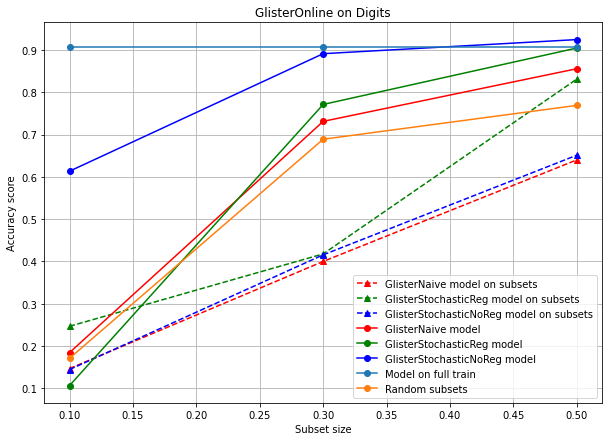

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.plot([0.1, 0.3, 0.5], glister_naive_subsets_test_acc, label = 'GlisterNaive model on subsets', linestyle = "--", color = "red", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_stoch_reg_subsets_test_acc, label = 'GlisterStochasticReg model on subsets', linestyle = "--", color = "green", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_stoch_no_reg_subsets_test_acc, label = 'GlisterStochasticNoReg model on subsets', linestyle = "--", color = "blue", marker = "^")
ax.plot([0.1, 0.3, 0.5], glister_naive_acc, label = 'GlisterNaive model', color = "red", marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_stoch_reg_acc, label = 'GlisterStochasticReg model', color = "green", marker = "o")
ax.plot([0.1, 0.3, 0.5], glister_stoch_no_reg_acc, label = 'GlisterStochasticNoReg model', color = "blue", marker = "o")
ax.plot([0.1, 0.3, 0.5], [full_train_acc] * 3, label = 'Model on full train', marker = "o")
ax.plot([0.1, 0.3, 0.5], random_subsets_acc, label = 'Random subsets', marker = "o")
#ax.plot([0.1, 0.3, 0.5], [rand_pred_test_acc] * 3, label = 'Random predictions')
plt.grid()
plt.title('GlisterOnline on Digits')
plt.xlabel("Subset size")
plt.ylabel("Accuracy score")
plt.legend();

### Save

In [33]:
data = np.array([glister_naive_subsets_test_acc, glister_stoch_reg_subsets_test_acc, glister_stoch_no_reg_subsets_test_acc, glister_naive_acc, glister_stoch_reg_acc, glister_stoch_no_reg_acc, [full_train_acc[0]]*3, random_subsets_acc])
labels = ['GlisterNaive model on subsets', 'GlisterStochasticReg model on subsets', 'GlisterStochasticNoReg model on subsets', 'GlisterNaive model', 'GlisterStochasticReg model', 'GlisterStochasticNoReg model', 'Model on full train', 'Random subsets']

In [34]:
data = pd.DataFrame(data, index=labels)
data.to_csv("acc_digits_linear", header=None)

In [86]:
np.savetxt('acc_digits_.out', data, delimiter=',') 